In [1]:
from helpers import *
from sentiment_functions import *
from emotion_functions import *

2022-07-18 14:59:45.653147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-18 14:59:45.653187: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-18 14:59:57.745679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-18 14:59:57.746055: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-18 14:59:57.746076: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (david-Aspire-A315-42): /proc/driver/nvidia/version does not exist
2022-07-18 14:59:57.746891: I tensorflow/core/platform/c

# SENTIMENT ANALYSIS

In [2]:
df= pd.read_csv('/home/david/Escritorio/sa_bertsent_fr_english_sentences_title.csv')

In [3]:
df=df.drop(df[df['Date']<'2020-01-01'].index,inplace=False)

In [4]:
df=df.drop(df[df['Date']>'2021-10-31'].index,inplace=False)

In [5]:
df.replace({'sentiment_title': 1}, {'sentiment_title': 'Neutral'}, regex=True,inplace=True)
df.replace({'sentiment_title': 0}, {'sentiment_title': 'Negative'}, regex=True,inplace=True)
df.replace({'sentiment_title': 2}, {'sentiment_title': 'Positive'}, regex=True,inplace=True)

In [6]:
df['Country']="France"

In [7]:
import ast
for index,row in df.iterrows(): 
    df['list_sentences'][index]= ast.literal_eval(df['list_sentences'][index])
    df['list_labels'][index]= ast.literal_eval(df['list_labels'][index])

In [8]:
list_porcentage_positive_sentences=[]
list_porcentage_neutral_sentences=[]
list_porcentage_negative_sentences=[]
for index,row in df.iterrows(): 
    list_porcentage_negative_sentences.append(df['list_labels'][index].count(0)/len(df['list_labels'][index]))
    list_porcentage_neutral_sentences.append(df['list_labels'][index].count(1)/len(df['list_labels'][index]))
    list_porcentage_positive_sentences.append(df['list_labels'][index].count(2)/len(df['list_labels'][index]))
df['porcentage_positive']=list_porcentage_positive_sentences
df['porcentage_negative']=list_porcentage_negative_sentences
df['porcentage_neutral']=list_porcentage_neutral_sentences

In [9]:
df['n_words'] = df.Text_en.apply(lambda x: len(str(x).split(' ')))

In [10]:
df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAMES_ENGLISH_WITH_SENTIMENT/sa_bertsent_fr_english_sentences_title.csv', index = False)

In [11]:
df

Title_en  \
0      How many people under 50 have already been vac...   
1      Covid-19. Vaccines, ski resorts, restaurants.....   
2      Lisieux. Vaccine against Covid-19: "We must do...   
3      Influenza: Fear of a vaccine shortage in Franc...   
4      Covid-19. Drop in critical care patients and i...   
...                                                  ...   
14510                 The essentials of the Covid crisis   
14511  Assessment of ten years of citizens' referrals...   
14512  Portugal: Socialists win municipal elections b...   
14513  In Guadeloupe, facing the vaccine, the slow aw...   
14514  Regional elections: how to vaccinate assessors...   

                                                 Text_en  \
0      It was a decision awaited by many 18-49 year o...   
1      A new press conference to give "visibility", a...   
2      "It went well," explains Jacqueline Simon, a r...   
3      In a few days' time, on Tuesday 13 October, th...   
4      Drop in Covid critical care patients. As Franc...   
...                                                  ...   
14510  The milestone of three billion injections of C...   
14511  This year the Constitutional Council is celebr...   
14512  Prime Minister Antonio Costa's Socialists won ...   
14513  Evan, 14 years old, became a star in one shot....   
14514  The double ballot for the departmental and reg...   

                                            Authors        Date  \
0                                  Maxime MAINGUET.  2021-05-27   
1                                             error  2021-01-07   
2              Clémentine LE RIDÉE.Louise DELÉPINE.  2021-01-13   
3                                    Léa BOISTAULT.  2020-10-09   
4              Philippe MATHÉ et Valentin DAVODEAU.  2021-05-04   
...                                             ...         ...   
14510                                      La Croix  2021-06-30   
14511                          Laurent de Boissieu,  2020-11-13   
14512                          La Croix (avec AFP),  2021-09-27   
14513  Marion Lecas, à Pointe-à-Pitre (Guadeloupe),  2021-08-26   
14514                                 Enola Richet,  2021-04-22   

                                                    Link     Newspaper  \
0      https://www.ouest-france.fr/sante/vaccin/combi...  Ouest France   
1      https://www.ouest-france.fr/sante/virus/corona...  Ouest France   
2      https://www.ouest-france.fr/normandie/lisieux-...  Ouest France   
3      https://www.ouest-france.fr/sante/grippe/gripp...  Ouest France   
4      https://www.ouest-france.fr/sante/virus/corona...  Ouest France   
...                                                  ...           ...   
14510  https://www.la-croix.com/JournalV2/essentiels-...      La Croix   
14511  https://www.la-croix.com/JournalV2/Bilan-dix-a...      La Croix   
14512  https://www.la-croix.com/Monde/Portugal-social...      La Croix   
14513  https://www.la-croix.com/Sciences-et-ethique/E...      La Croix   
14514  https://www.la-croix.com/France/Elections-regi...      La Croix   

      sentiment_title                                     list_sentences  \
0             Neutral  [It was a decision awaited by many 18-49 year ...   
1             Neutral  [A new press conference to give "visibility", ...   
2            Positive  ["It went well," explains Jacqueline Simon, a ...   
3            Negative  [In a few days' time, on Tuesday 13 October, t...   
4            Negative  [Drop in Covid critical care patients., As Fra...   
...               ...                                                ...   
14510         Neutral  [The milestone of three billion injections of ...   
14511         Neutral  [This year the Constitutional Council is celeb...   
14512         Neutral  [Prime Minister Antonio Costa's Socialists won...   
14513         Neutral  [Evan, 14 years old, became a star in one shot...   
14514         Neutral  [The double ballot for the departmental and re...   


# General descriptive analysis of articles in FRANCE

In [12]:
list_sentences=[]
for index,row in df.iterrows(): 
    for sentence in df['list_sentences'][index]:
        list_sentences.append(sentence)
len(list_sentences)

412077

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Pasteurdon. Alexandra Lamy and Marina Carrère d'Encausse support the event
Vaccine: this feat of modern science is to be welcomed
Covid: France has caught up with the vaccination gap thanks to young people
SAMPLES OF NEGATIVE HEADLINES
Covid-19. Out of the coma, she warns: "It's reckless not to get vaccinated".
Against the health pass, thousands of people march in the rain for a twelfth day of mobilisation
Covid-19. Cholet vaccination centre short of doses, appointments blocked


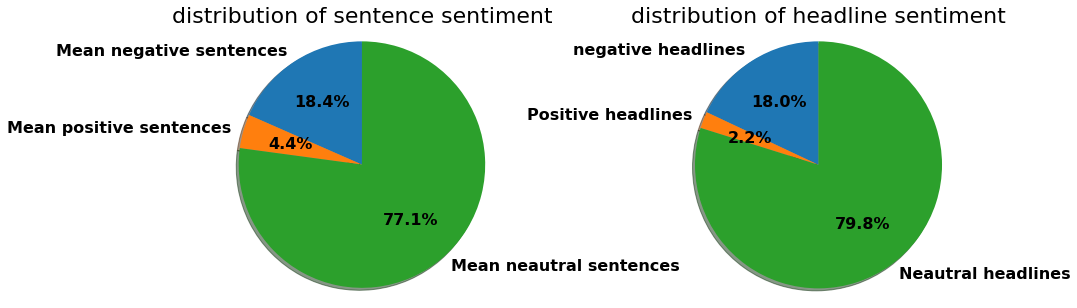

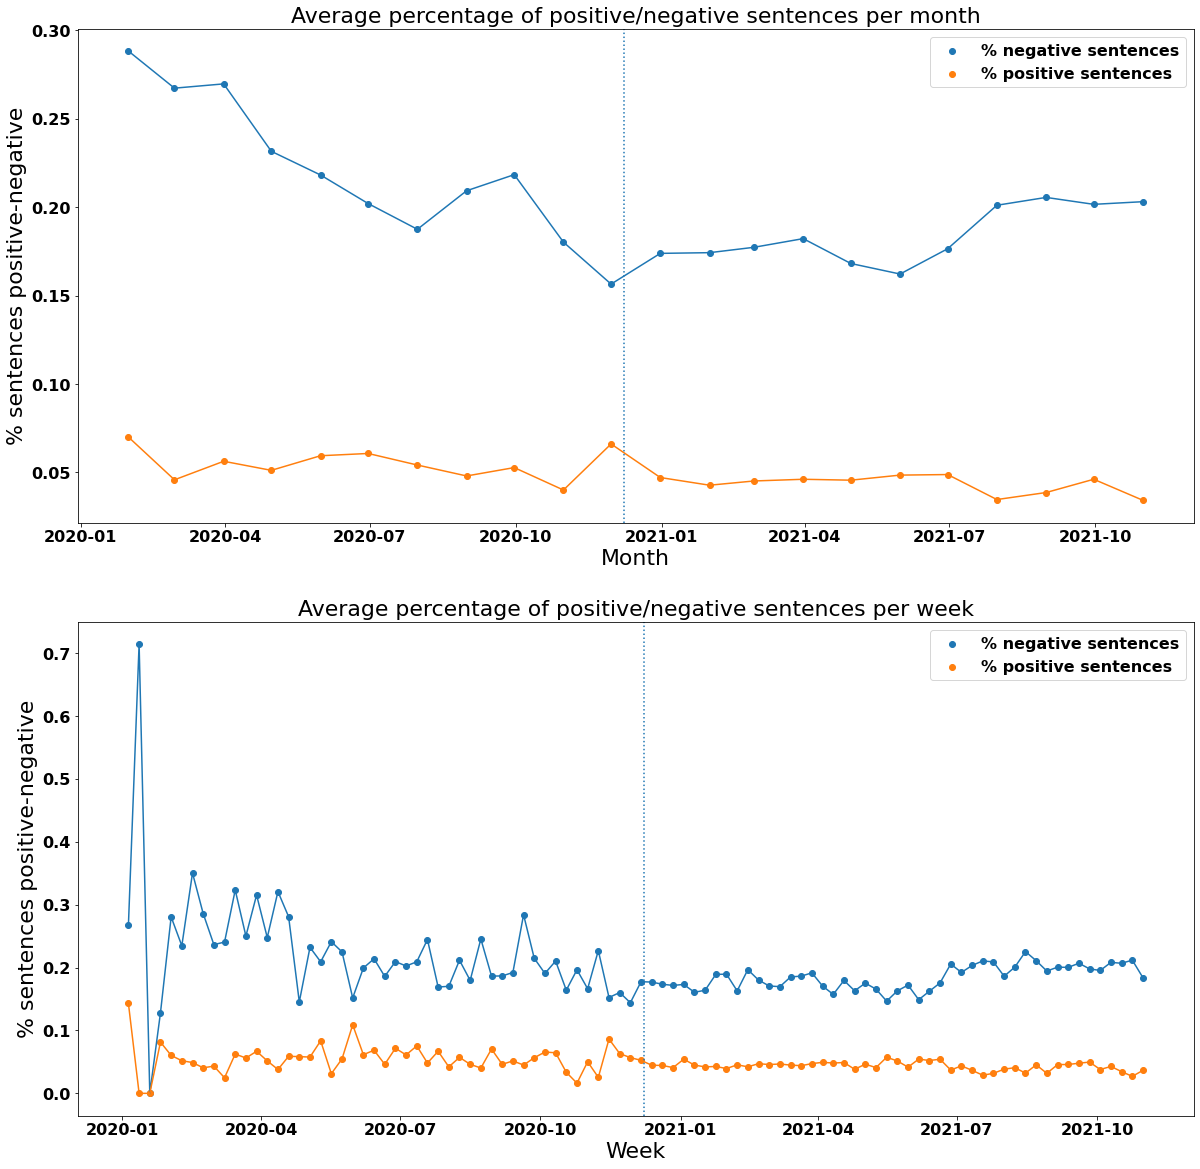

In [13]:
sentiment_analysis(df,'2020-12-08')

In [ ]:
# emotion_analysis(df)

In [ ]:
# df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_fr_english_title_emotion.csv', index = False)

In [2]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_fr_english_title_emotion.csv')

In [3]:
def plot_emotions(subset):
        
    my_labels = subset['emotion_transformers_1'].value_counts().sort_values().unique()
    ax = subset['emotion_transformers_1'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct)
    ax.axes.get_yaxis().set_visible(False)
    plt.legend()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


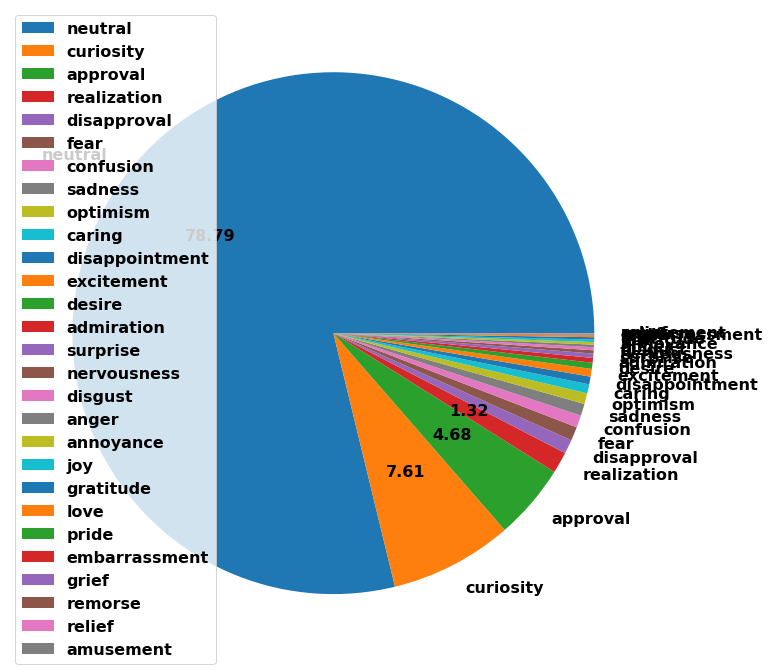

In [4]:
plot_emotions(df)

# SUBTOPICS 

I think it is useful for the analysis of subtopics not to take into account the articles that review the most important news of the week, because they deal with many different topics and I consider that they have an impact on the results.

In [5]:
df_sub=df.drop(df[df['n_words']>3000].index,inplace=False)

In [8]:
ue_words="European Union|EU|European Commission"
european_union=df_sub[(df_sub['Title_en'].str.contains(ue_words))|(df_sub['Text_en'].str.contains(ue_words))]

In [9]:
len(european_union[european_union['sentiment_title']=="Negative"])/len(european_union)

0.1391065830721003

In [10]:
len(european_union)/len(df_sub)

0.17765402018795684

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
AstraZeneca's vaccine. "Very reassuring evidence" of its safety, says co-developer
Opinion | Everyone will win in the vaccine raceContent reserved for subscribers
Jean-Yves Le Drian: "Giving new impetus to our policy of solidarity development
SAMPLES OF NEGATIVE HEADLINES
France has passed the 80,000 mark for coronavirus deaths
Europe ready to order Russian vaccines
Covid: a failed first date with vaccines


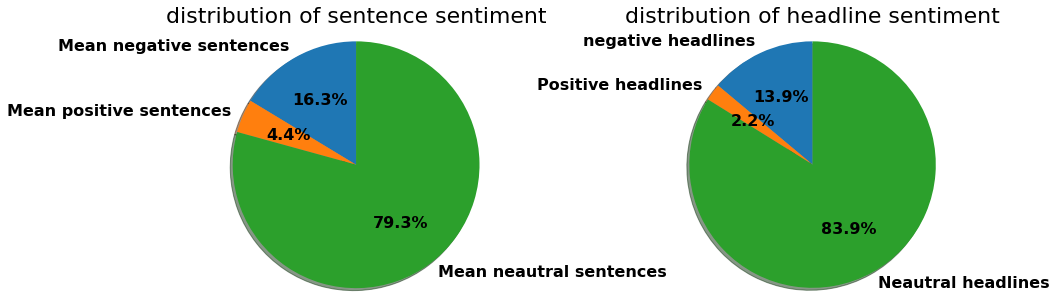

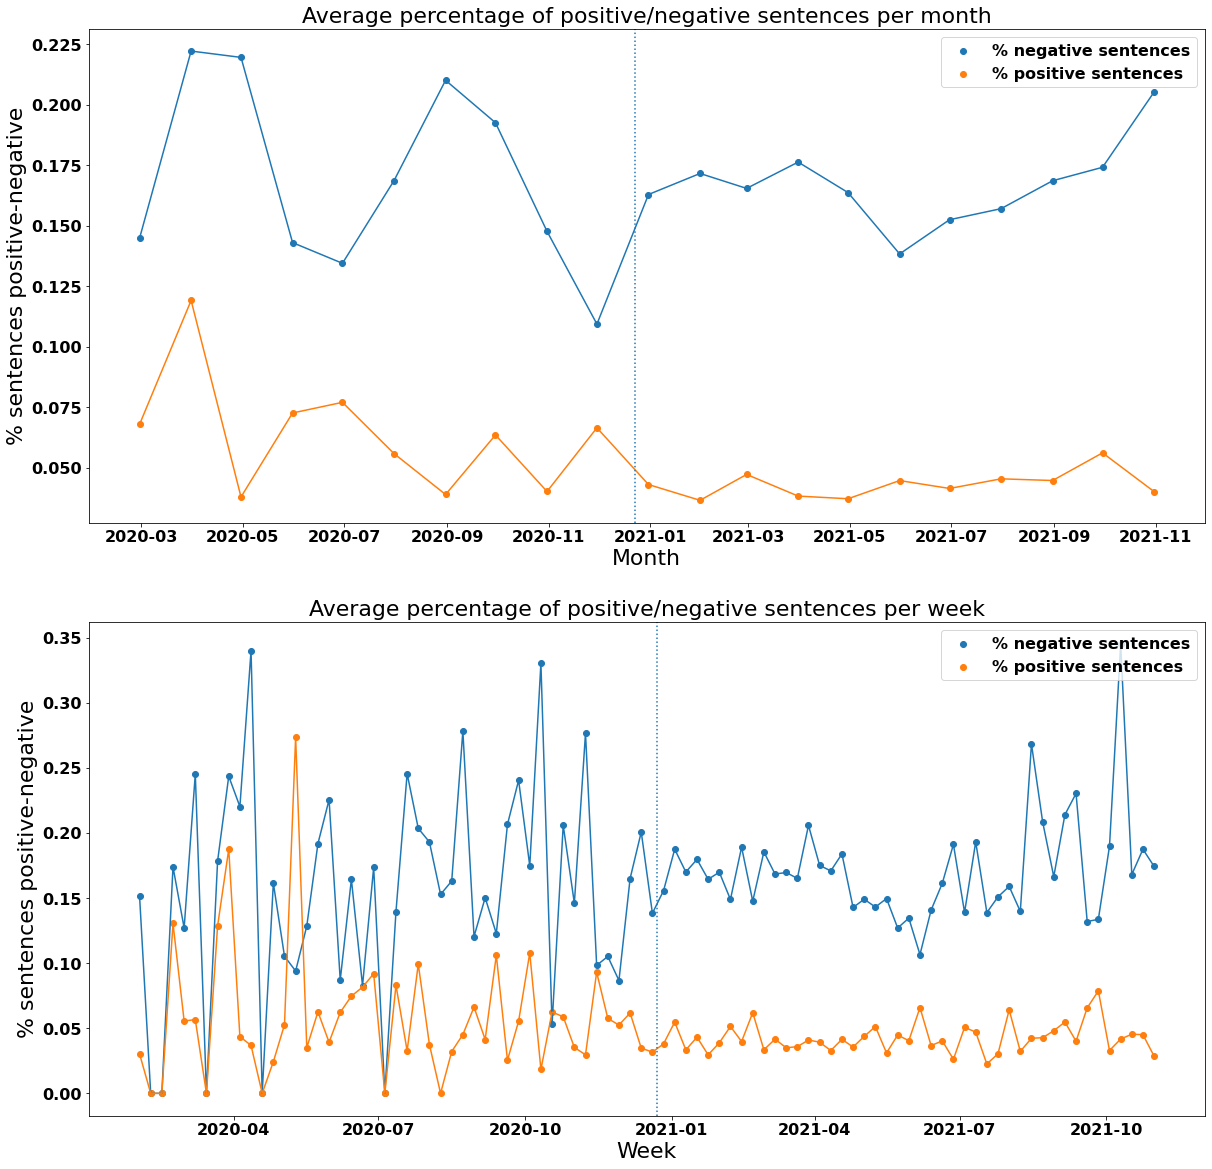

In [11]:
sentiment_analysis(european_union,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


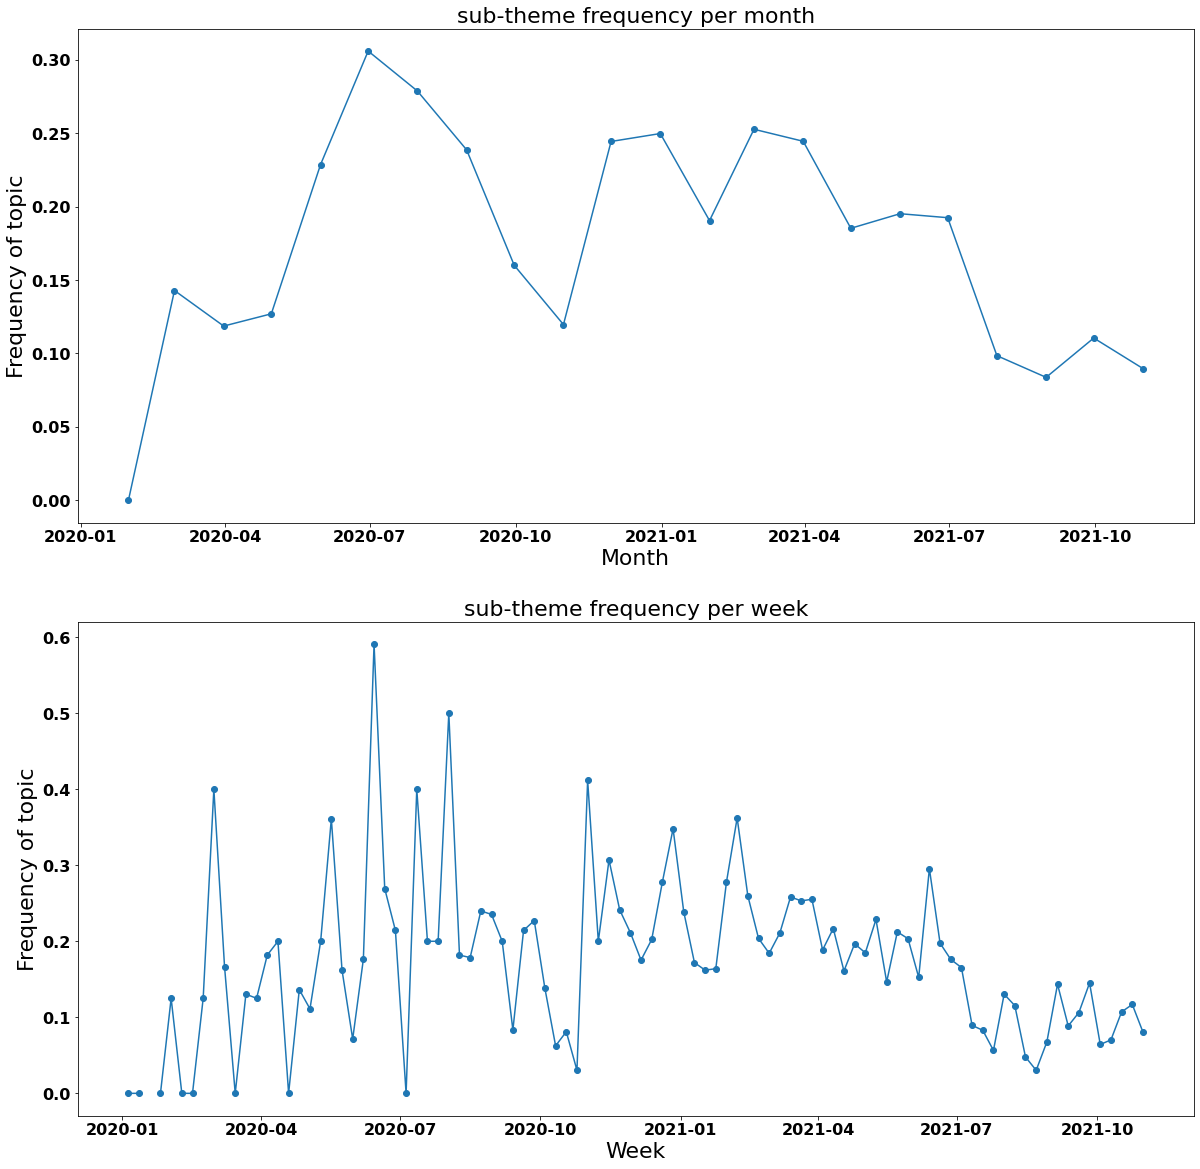

In [12]:
frequency_topics(df_sub, european_union)

In [13]:
# #get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(european_union.list_labels[39]) if x == 0]
# for i in indices: 
#     print(european_union.list_sentences[39][i])

In [14]:
sentences_with_word(european_union,ue_words)

ValueError: Length of values (259317) does not match length of index (12406204)

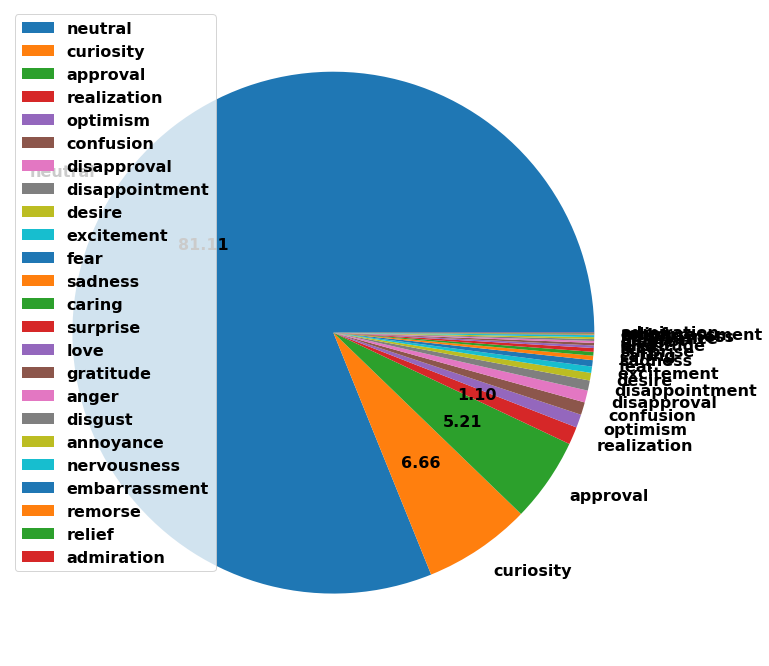

In [15]:
plot_emotions(european_union)

In [6]:
no_vax_words="anti-vaxxers|anti-vaccine|anti-vaxx|anti-corona|no-vax|no vax|anti-vaccin"
no_vax=df_sub[(df_sub['Title_en'].str.contains(no_vax_words))|(df_sub['Text_en'].str.contains(no_vax_words))]
len(no_vax)/len(df_sub)

0.03717368604246432

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
AstraZeneca. Yes, it is effective, and the laboratory's managers have never said otherwise
Belén Garijo (Merck): The smaller you are, the smarter you have to be "Subscriber content
"The Great Expansion, hope deflects
SAMPLES OF NEGATIVE HEADLINES
Vaccines. Why are we still hesitant? A mistrust that is difficult to cure
Covid. More than 4,000 new cases, Olivier Véran sounds the alarm before Emmanuel Macron's speech
Rudy Reichstadt: "Conspiracy is a threat to our democracies "Subscribers only


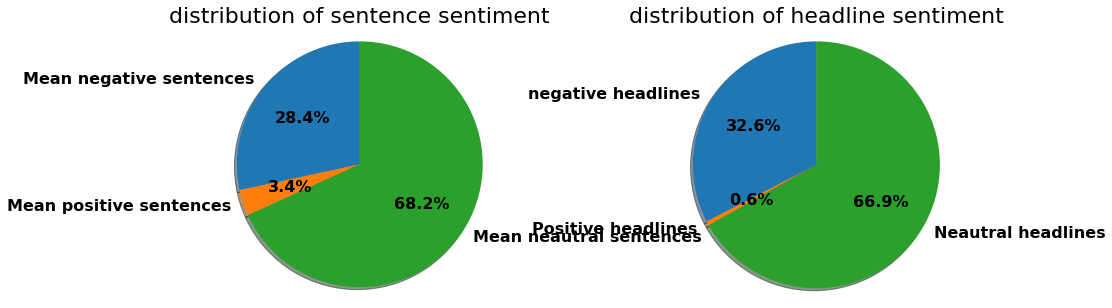

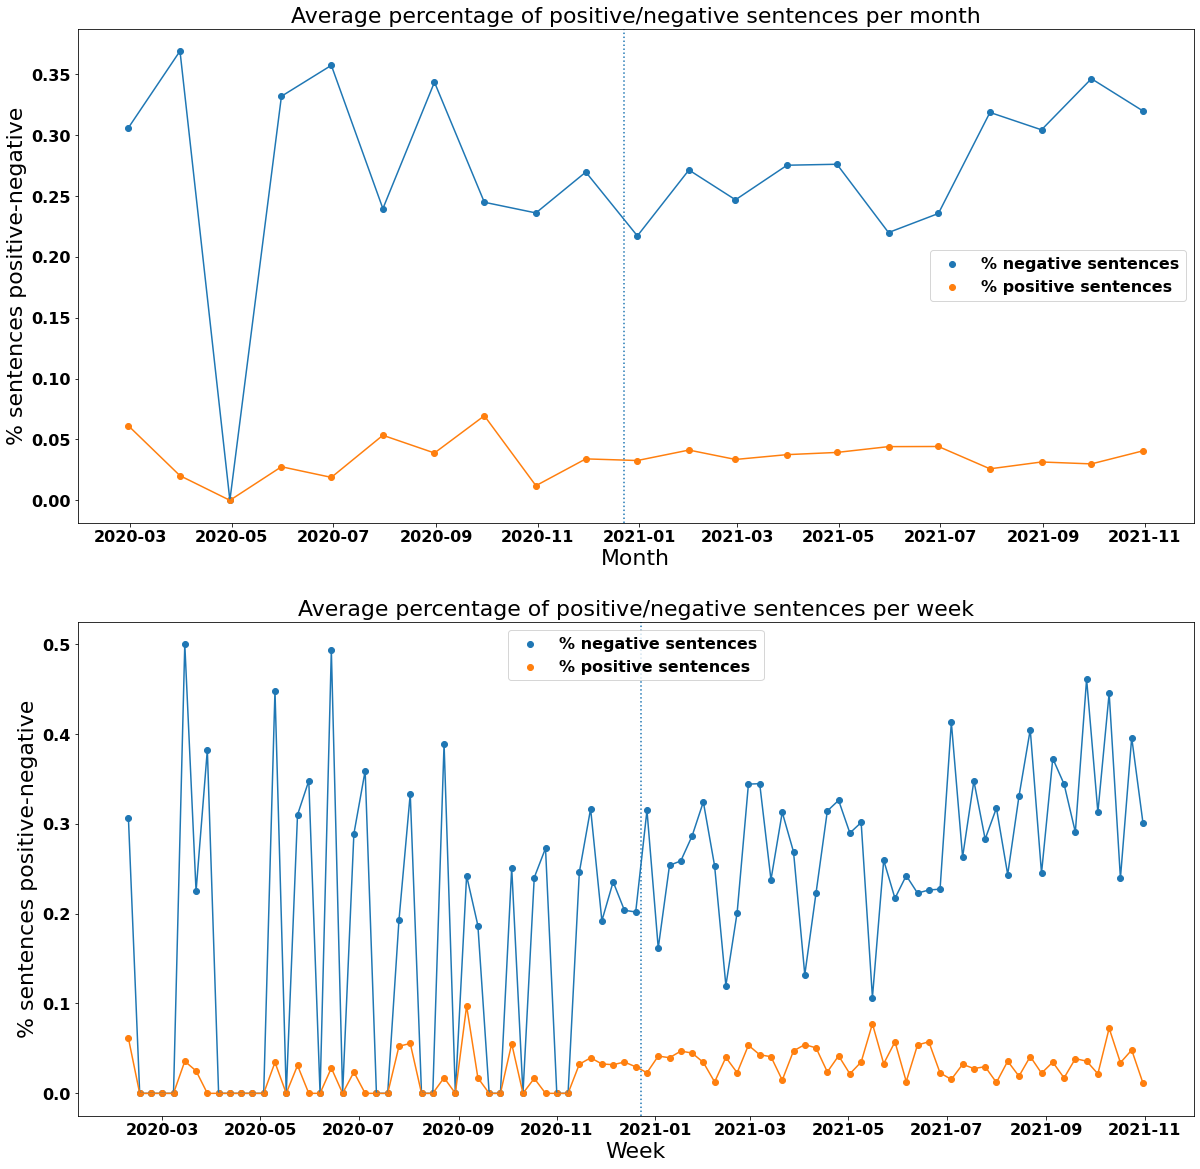

In [7]:
sentiment_analysis(no_vax,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


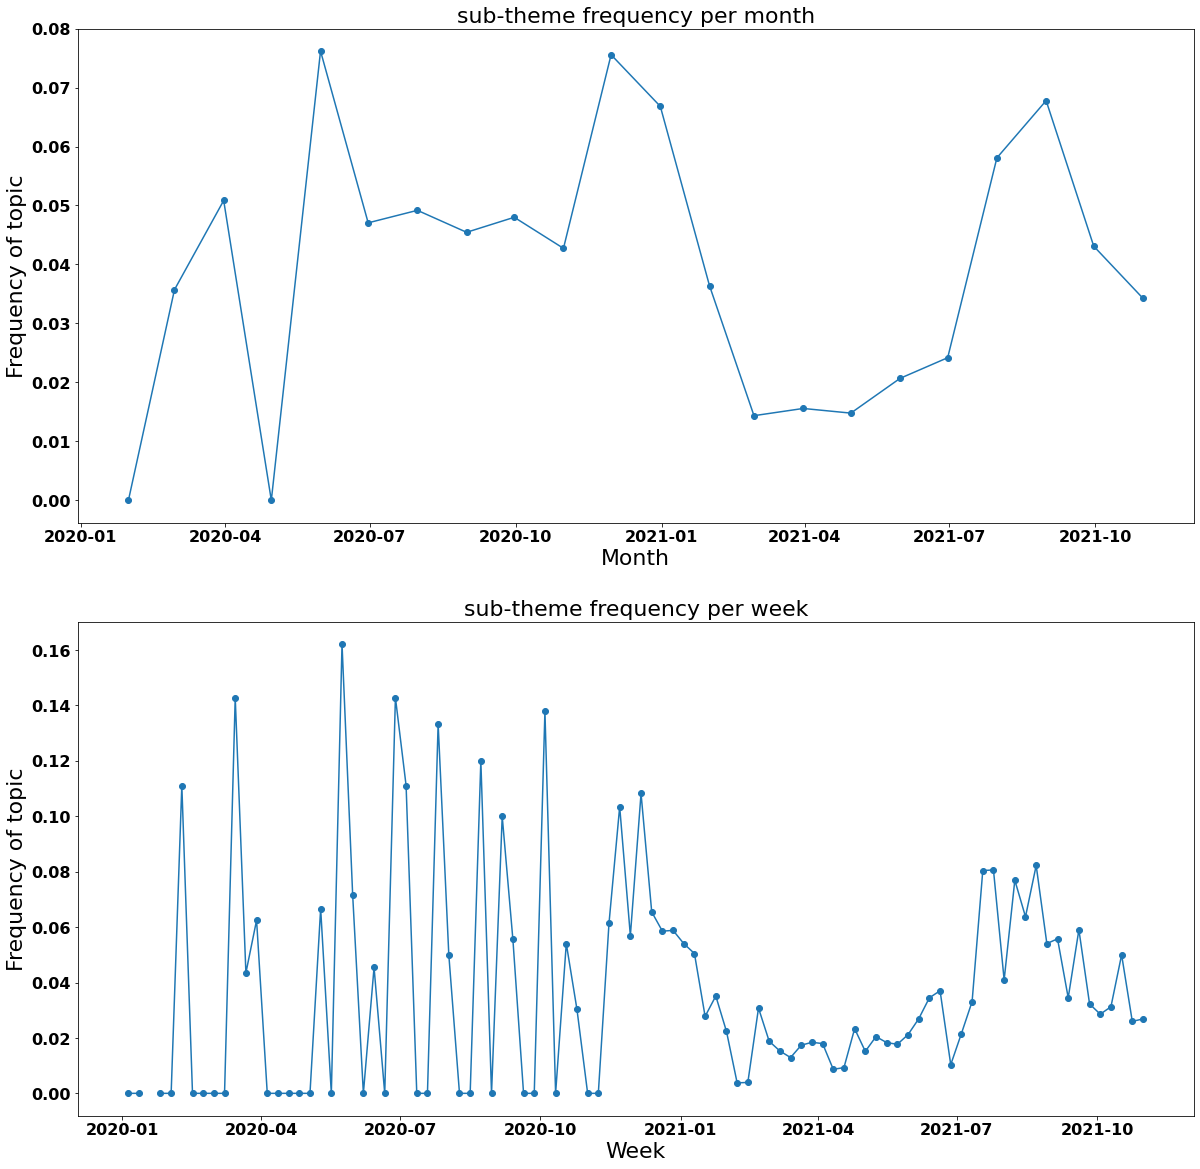

In [8]:
frequency_topics(df_sub, no_vax)

In [9]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(no_vax.list_labels[33]) if x == 0]
for i in indices: 
    print(no_vax.list_sentences[33][i])

SAMPLES OF POSITIVE SENTENCES
This result is all the more impressive given that Italy has seen anti-vaccine movements flourish over the past decade or so, against a backdrop of conspiracy theorising and rejection of the big pharmaceutical groups.
The jibe is aimed at the anti-vaccine crowd, but the 60-year-old can only be pleased with the turnout.
SAMPLES OF NEGATIVE SENTENCES
Most of these claims have been circulating for years and are widely picked up by the anti-vaccine community.
However, even if the militant anti-vaccine communities only represent a minority, it is clear that mistrust of the health authorities is at an all-time high in France.


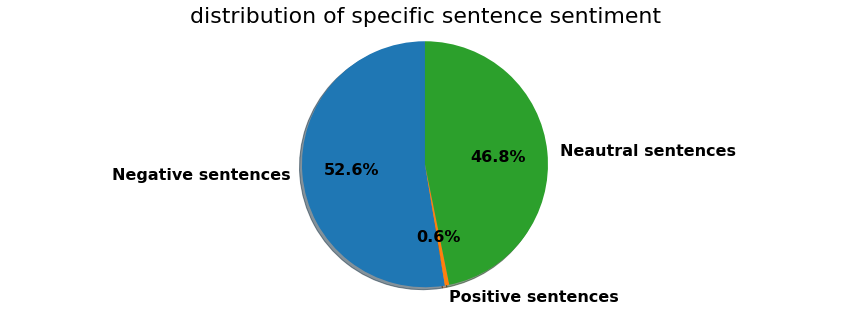

In [26]:
sentences_with_word(no_vax,no_vax_words)

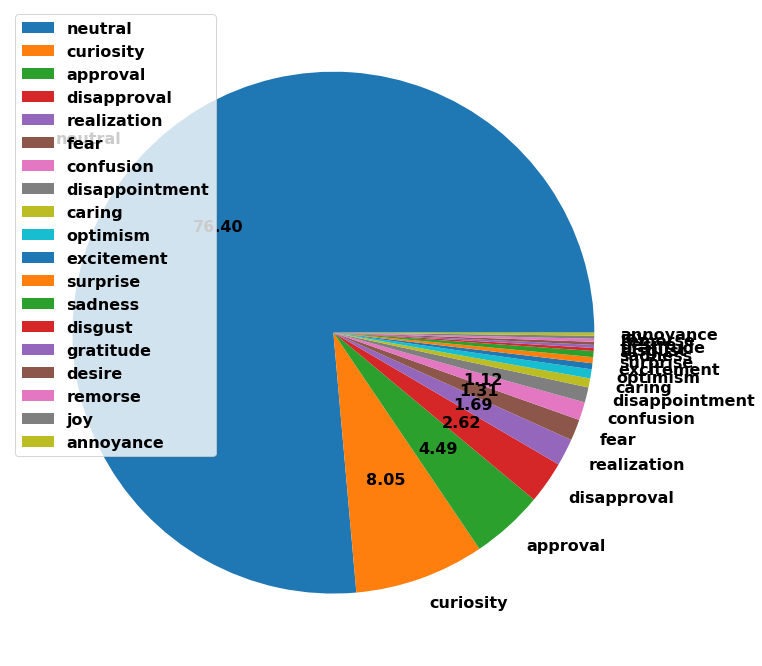

In [10]:
plot_emotions(no_vax)

In [27]:
economy_words="gdp|bank|economy|economist|investment|market"
economy=df_sub[(df_sub['Title_en'].str.contains(economy_words))|(df_sub['Text_en'].str.contains(economy_words))]
len(economy)/len(df_sub)

0.22680125304559692

SAMPLES OF POSITIVE HEADLINES
The mayor of Caen, Joël Bruneau, approaches the start of the new school year "more serenely but with vigilance".
Vœux 2021: the French are formidable
Moderna optimistic about its Covid-19 vaccine
SAMPLES OF NEGATIVE HEADLINES
Covid-19. Russia records daily Covid-19 deaths at 857
Romania sinks into political crisis after government collapse
Najat Vallaud-Belkacem tested positive for Covid-19 and suspended her campaign


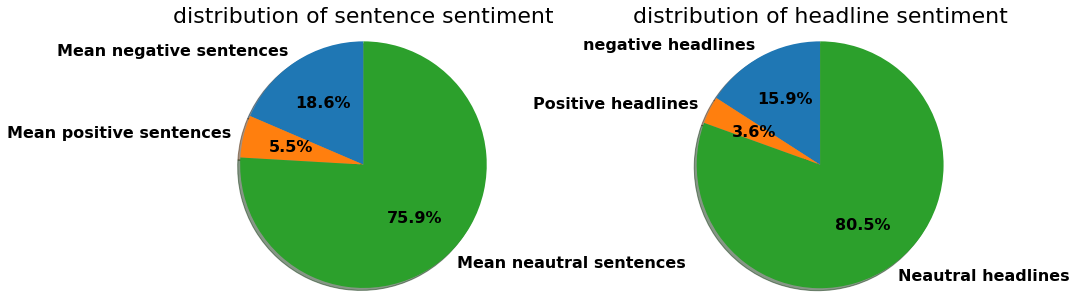

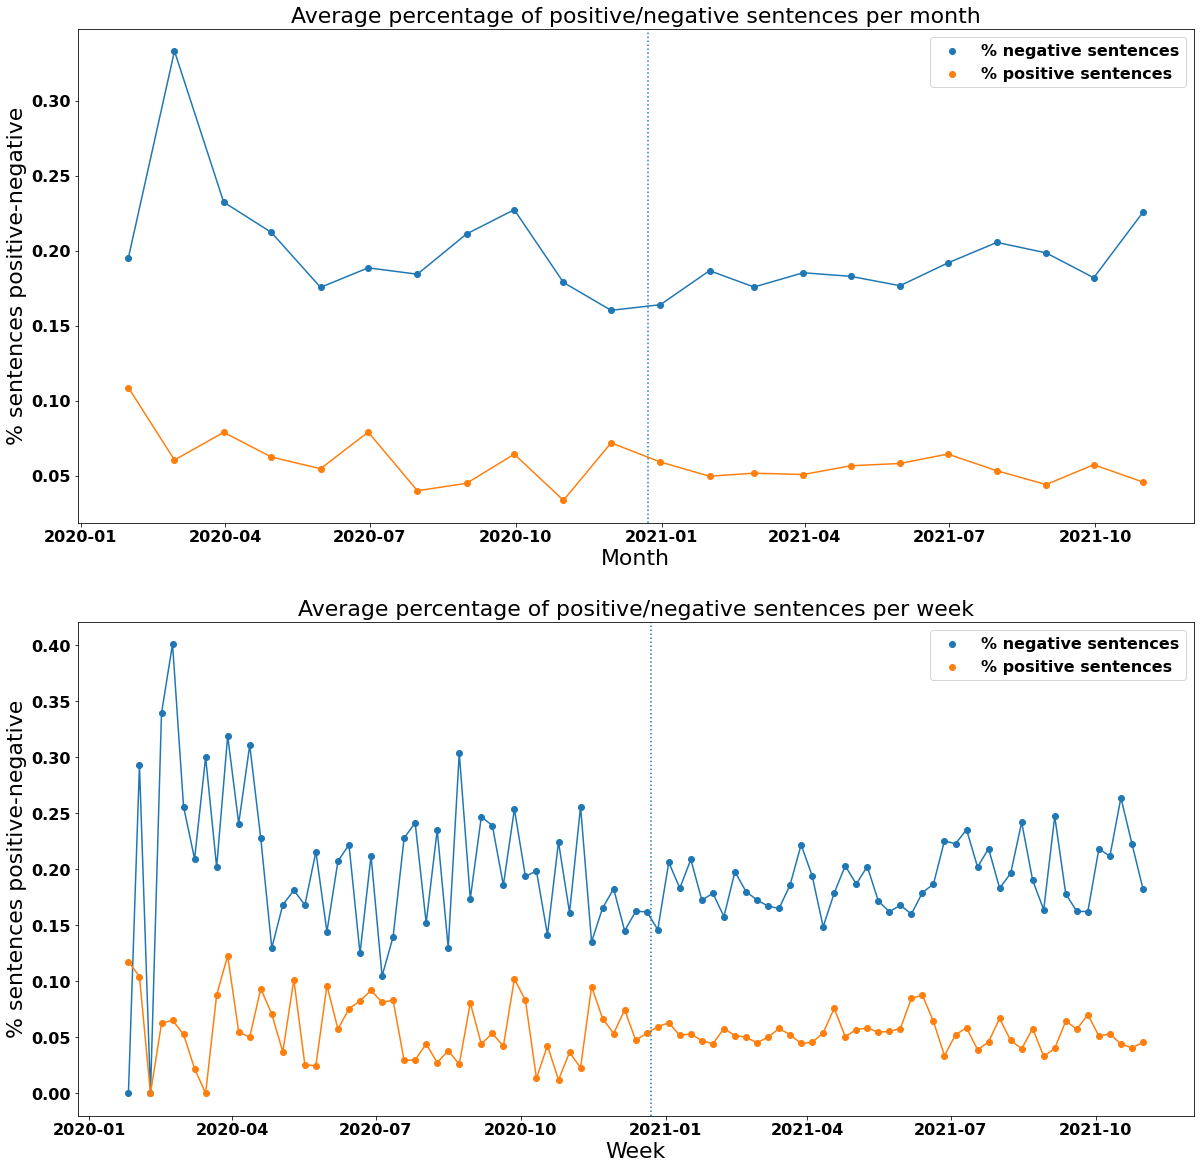

In [28]:
sentiment_analysis(economy,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


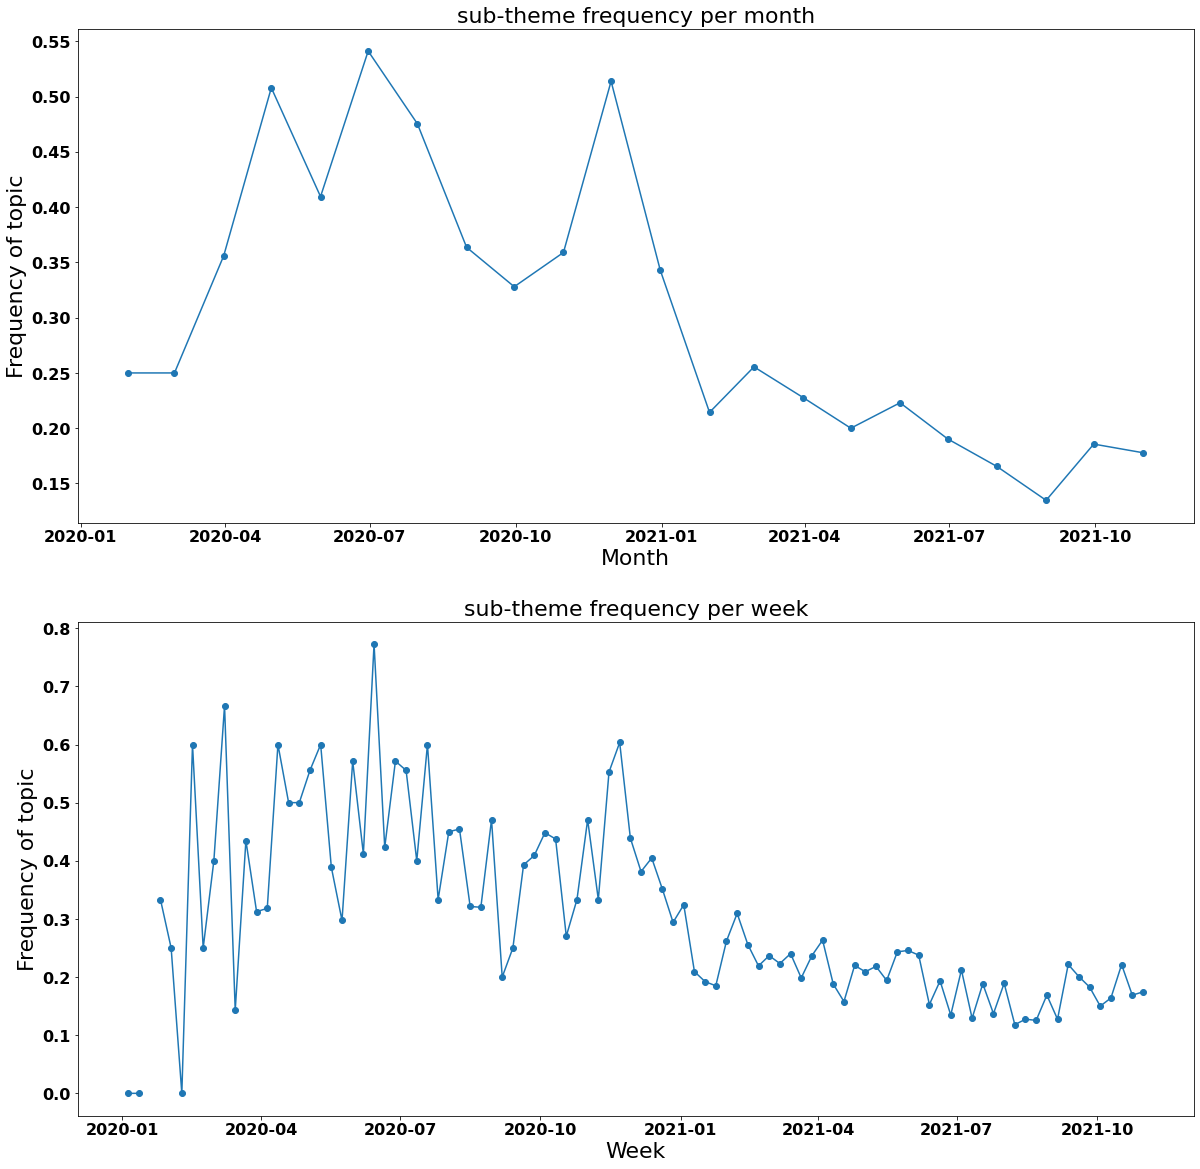

In [29]:
frequency_topics(df_sub, economy)

SAMPLES OF POSITIVE SENTENCES
Until now, tourism was one of the compelling reasons for travelling to Polynesia in order to preserve its economy.
The liberal economy is a great way to advance society.
SAMPLES OF NEGATIVE SENTENCES
The economy is not looking good either: with unemployment at more than 30%, and a growth estimate, according to the IMF, of -7.5% for 2020, South Africa will find it difficult to recover from a crisis exacerbated by the coronavirus.
Throughout the summer, the vaccinobus travelled through the countryside, public gardens and supermarket car parks, giving some 4,500 injections.


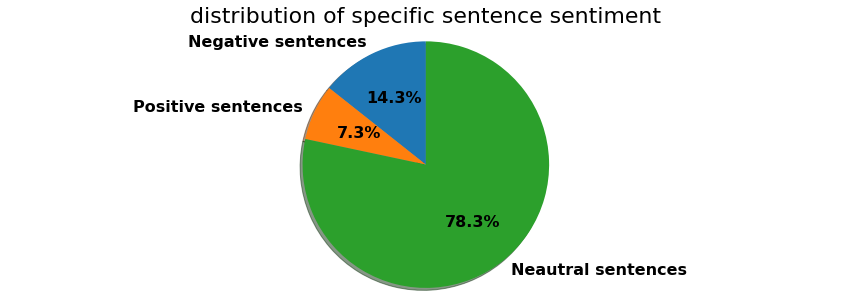

In [30]:
sentences_with_word(economy,economy_words)

In [31]:
economy

Title_en  \
3      Influenza: Fear of a vaccine shortage in Franc...   
7      Covid-19. The vaccine developed by Sanofi will...   
14     Covid-19 vaccines. Rennes 1 explains why it is...   
15     Question of the day. Will you get vaccinated a...   
23     Covid-19. The British no longer want the vacci...   
...                                                  ...   
14495    "Wealth tax has brought in more than expected".   
14499       A single dose of vaccine for former patients   
14502   What can we expect from a vaccine against Covid?   
14506  Covid-19 and ventilation: what is the risk of ...   
14507   Covid-19: a new breakthrough in the vaccine race   

                                                 Text_en  \
3      In a few days' time, on Tuesday 13 October, th...   
7      The Regional University Hospital of Tours (Ind...   
14     The principle of vaccination has been known fo...   
15     Good news that could be a game-changer on the ...   
23     After the record order, the cold shower. The B...   
...                                                  ...   
14495  Three years later, what is your assessment of ...   
14499  A new twist on the Covid-19 vaccination front....   
14502  Never before seen. Barely 11 months after the ...   
14506  Air rather than surfaces. One year after the f...   
14507  A vaccine for 2021? An increasingly realistic ...   

                                Authors        Date  \
3                        Léa BOISTAULT.  2020-10-09   
7                               avec NG  2020-11-30   
14                    Olivier BERREZAI.  2021-01-10   
15                                error  2020-11-09   
23                    Philippe GAMBERT.  2021-09-13   
...                                 ...         ...   
14495  Recueilli par Mathieu Castagnet,  2021-07-12   
14499                    Jeanne Ferney,  2021-02-15   
14502   Audrey Dufour et Jeanne Ferney,  2020-10-01   
14506                  Mathieu Laurent,  2021-05-09   
14507          Marie-Valentine Chaudon,  2020-11-09   

                                                    Link     Newspaper  \
3      https://www.ouest-france.fr/sante/grippe/gripp...  Ouest France   
7      https://www.ouest-france.fr/centre-val-de-loir...  Ouest France   
14     https://www.ouest-france.fr/bretagne/rennes-35...  Ouest France   
15     https://www.ouest-france.fr/sante/virus/corona...  Ouest France   
23     https://www.ouest-france.fr/sante/virus/corona...  Ouest France   
...                                                  ...           ...   
14495  https://www.la-croix.com/JournalV2/Limpot-fort...      La Croix   
14499  https://www.la-croix.com/JournalV2/seule-dose-...      La Croix   
14502  https://www.la-croix.com/JournalV2/peut-attend...      La Croix   
14506  https://www.la-croix.com/Sciences-et-ethique/C...      La Croix   
14507  https://www.la-croix.com/Sciences-et-ethique/C...      La Croix   

      sentiment_title                                     list_sentences  \
3            Negative  [In a few days' time, on Tuesday 13 October, t...   
7             Neutral  [The Regional University Hospital of Tours (In...   
14            Neutral  [The principle of vaccination has been known f...   
15            Neutral  [Good news that could be a game-changer on the...   
23           Negative  [After the record order, the cold shower., The...   
...               ...                                                ...   
14495         Neutral  [Three years later, what is your assessment of...   
14499        Negative  [A new twist on the Covid-19 vaccination front...   
14502         Neutral  [Never before seen., Barely 11 months after th...   
14506         Neutral  [Air rather than surfaces., One year after the...   
14507        Positive  [A vaccine for 2021?, An increasingly realisti...   

                                             list_labels Country  \
3      [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, ...  France   
7      

In [32]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(economy.list_labels[14495]) if x == 2]
for i in indices: 
    print(economy.list_sentences[14495][i])

The reform contributes to the fact that France has become the most attractive country in the euro zone.
The 500 largest fortunes in France have prospered during the crisis.
France is one of the countries where the redistribution system reduces inequalities the most.
During the crisis, we were keen to protect the most vulnerable households.
O. D.: Yes, France remains solid.
We were able to mobilise exceptional financial resources in the face of the crisis thanks to the support of the European Union, but also because we had recovered the country.
For three years we have respected the 3% deficit rule, lowered taxes and public spending.


In [33]:
education_words="education|pupil|classroom|student|school"
education=df_sub[(df_sub['Title_en'].str.contains(education_words))|(df_sub['Text_en'].str.contains(education_words))]
len(education)/len(df_sub)

0.2343891402714932

SAMPLES OF POSITIVE HEADLINES
Covid-19: Russia boasts the world's first licensed vaccine
Pfizer/BioNTech vaccine 100% effective in 12-15 year olds
Young people's mobility in Europe must be revived
SAMPLES OF NEGATIVE HEADLINES
Covid-19 epidemic worsens, jeopardising Emmanuel Macron's 'third way'
INTERVIEW: "The major danger for children is not the epidemic but mental health
TESTIMONIALS. Contaminated despite the vaccine: "I didn't think it could be Covid-19


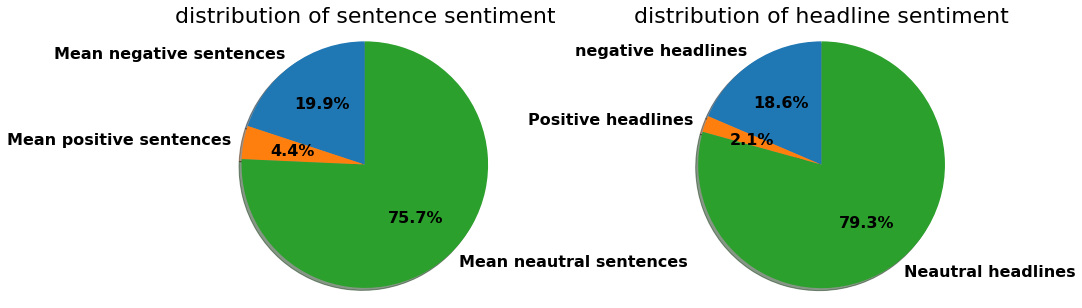

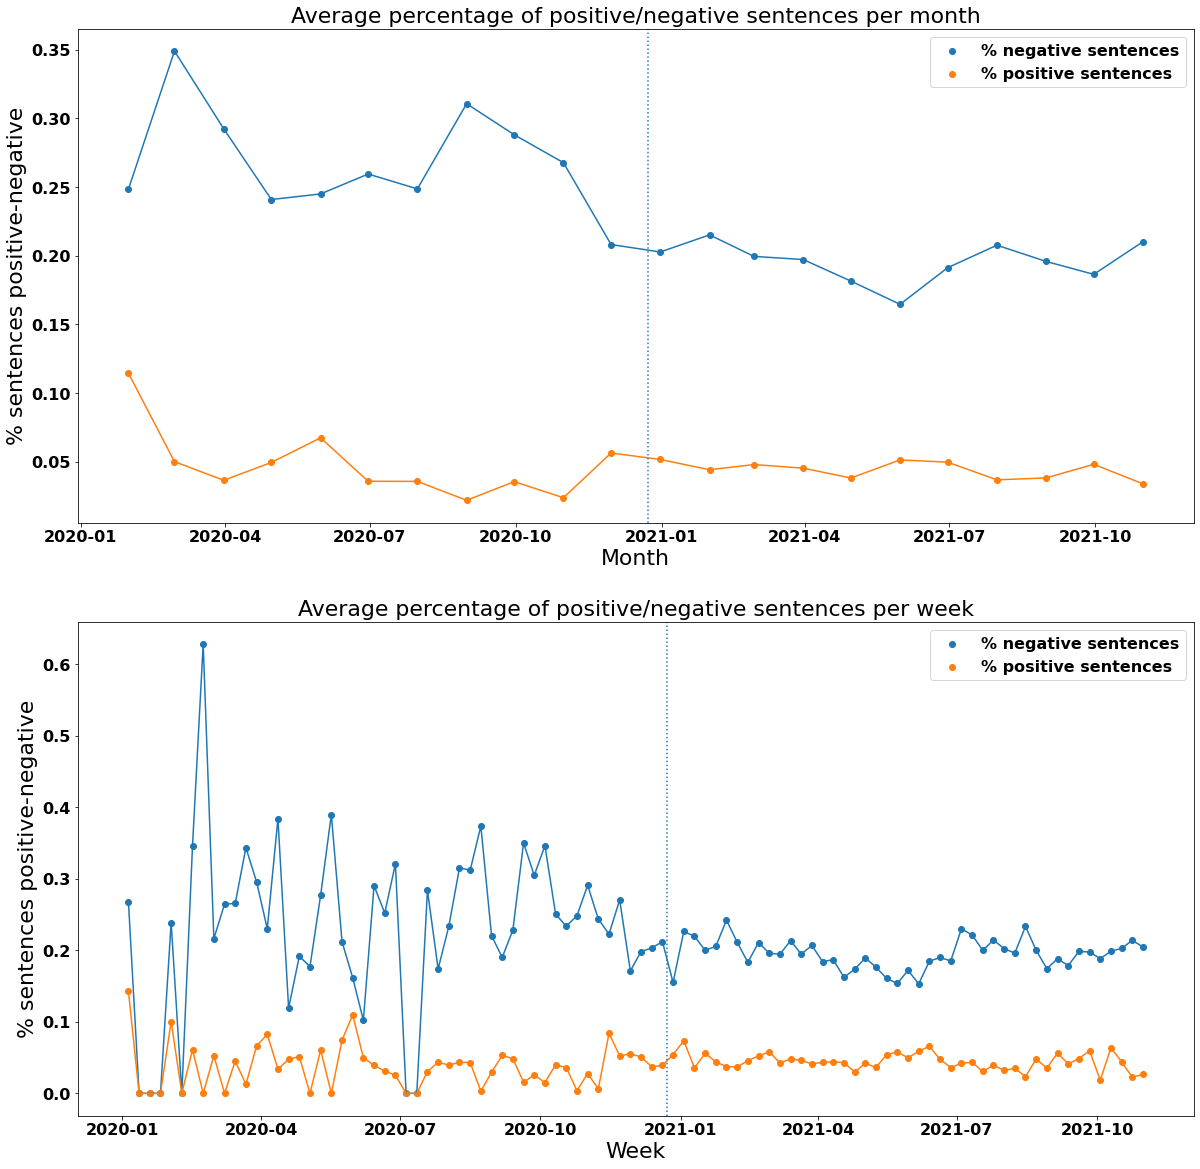

In [34]:
sentiment_analysis(education,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


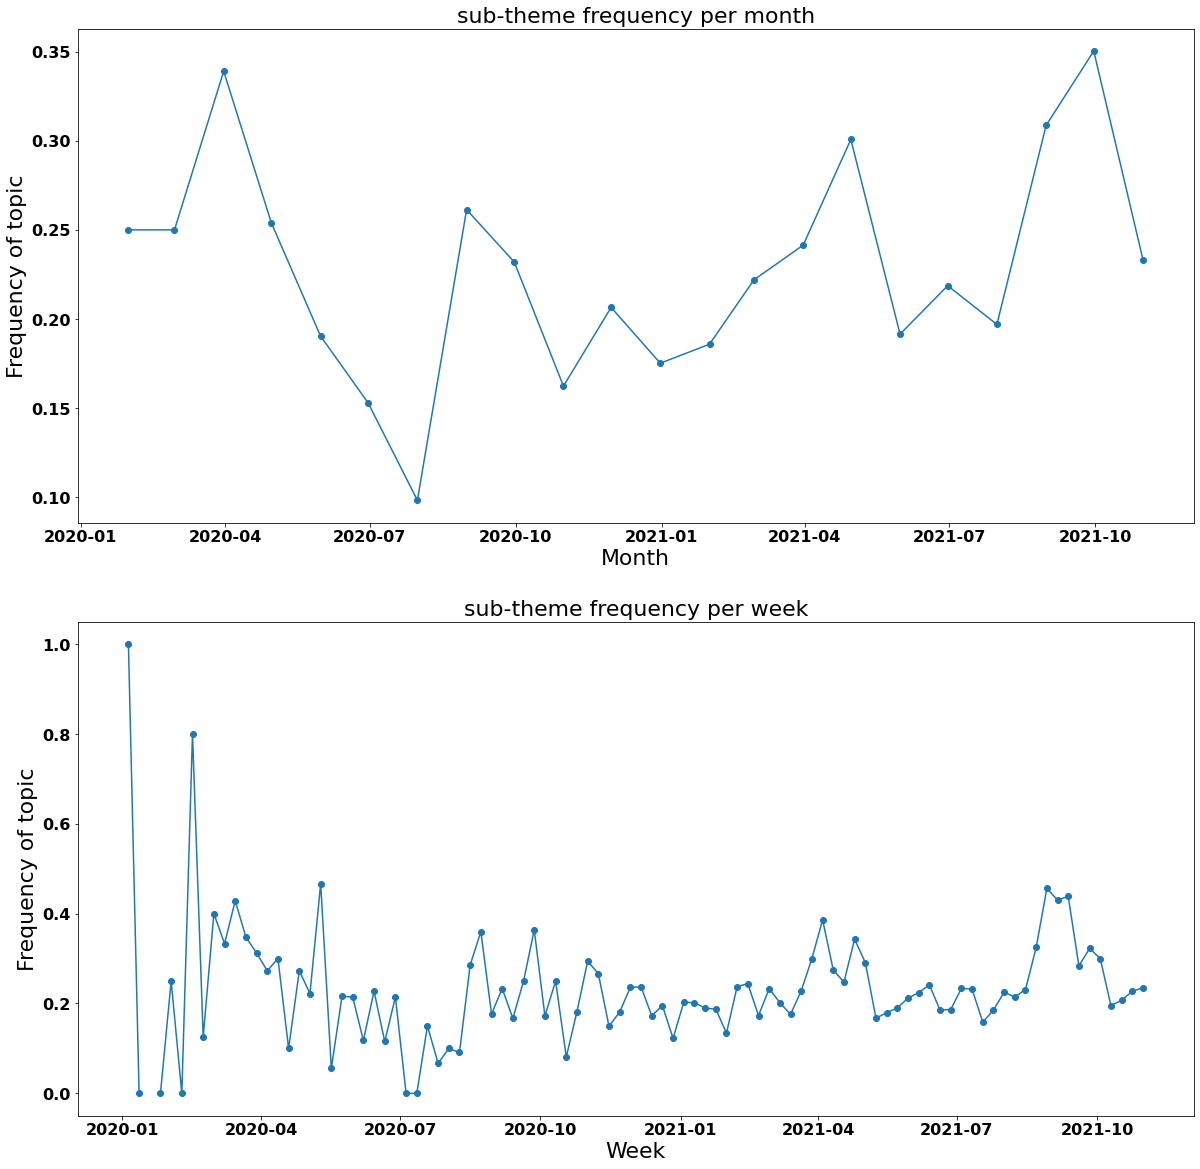

In [35]:
frequency_topics(df_sub, education)

SAMPLES OF POSITIVE SENTENCES
For this reason, the Mexican bishops wish to send a message to the whole of society, to the bodies of the three powers of the Union, to the political, commercial, educational, religious and social institutions that give life to our country (1), to all the actors who, whatever their position, are concerned about the present and the future of Mexico.
I think it's the most responsible choice," says the schoolgirl.
SAMPLES OF NEGATIVE SENTENCES
In this case, eleven people under the age of 18 are accused of beating the 15-year-old schoolboy on 15 January.
Whatever Jean-Michel Blanquer may say, home schooling is not school."


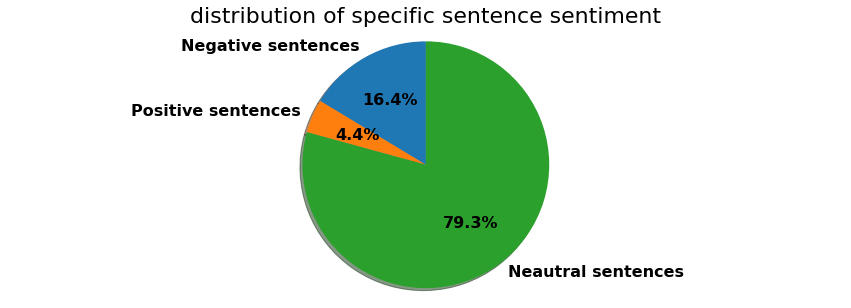

In [36]:
sentences_with_word(education,education_words)

In [37]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(education.list_labels[33]) if x == 0]
for i in indices: 
    print(education.list_sentences[33][i])

"On social networks, there have been numerous condemnations of the comments made by Xavier Lemoine, mayor of Montfermeil, on vaccination.
In his editorial, the elected representative, who regularly shares his anti-vax positions on his personal account, uses an alarmist tone.
Karine Lacombe, an infectious diseases specialist and head of the infectious diseases department at Saint-Antoine Hospital (AP-HP) in Paris, said on her Twitter account that she was "appalled" by the position taken by the mayor of Montfermeil.
"It is in the 93 that we have the fewest vaccinated and the most hospitalizations and deaths in the Ile-de-France region, (with) many evacuations to the AP-HP intensive care unit, and Mr. Mayor (of Montfermeil) says "early treatment" and militates against the (anti-)Covid-19 vaccine?
The virus kills.
So does irresponsibility".
For the NGO Citizen4science, which expressed itself on Twitter, this position constitutes "scientific and medical disinformation that kills".


SAMPLES OF POSITIVE HEADLINES
World stock markets off to a flying startContent reserved for subscribers
Covid-19 worldwide: Pfizer-BioNTech's vaccine 97% effective against symptomatic cases
Tokyo Olympics: road cycling: a hotly contested final and a great crowd
SAMPLES OF NEGATIVE HEADLINES
Covid-19: 12,532 new cases of infection in France in the last 24 hours
Trump calls for 'reconciliation', 200,000 deaths from Covid-19 in Brazil, 2020 hottest year on record: the main news of this Friday morning
Live - Covid-19: nearly 24,000 new cases in 24 hours


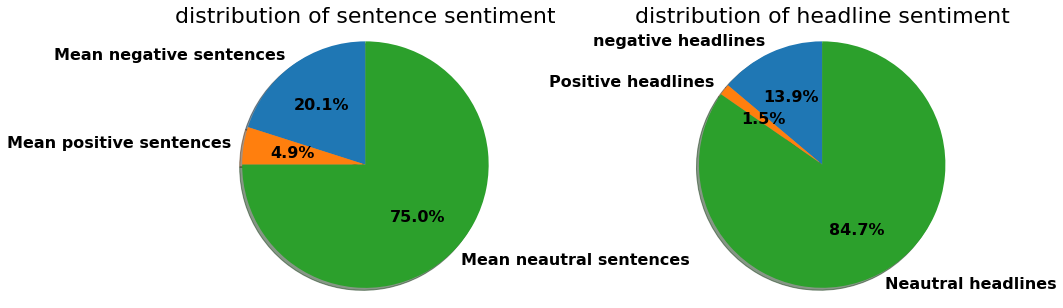

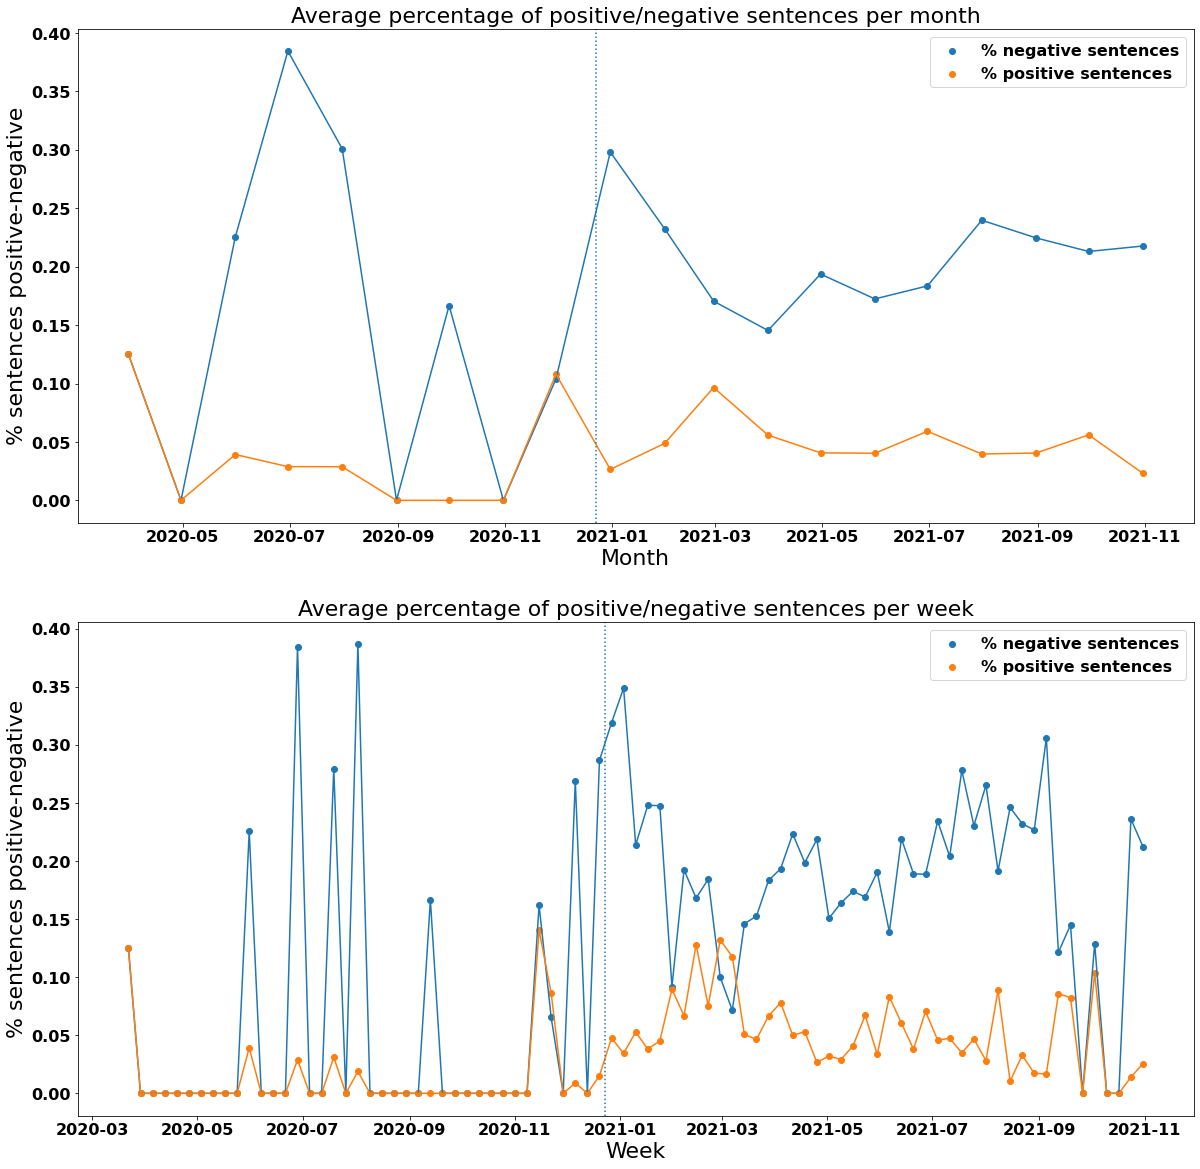

0.02359902540898016

In [38]:
olympics_words="Olympics|Olympic Games|Tokyo"
olympics=df_sub[(df_sub['Title_en'].str.contains(olympics_words))|(df_sub['Text_en'].str.contains(olympics_words))]
sentiment_analysis(olympics,'2020-12-23')
len(olympics)/len(df_sub)

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


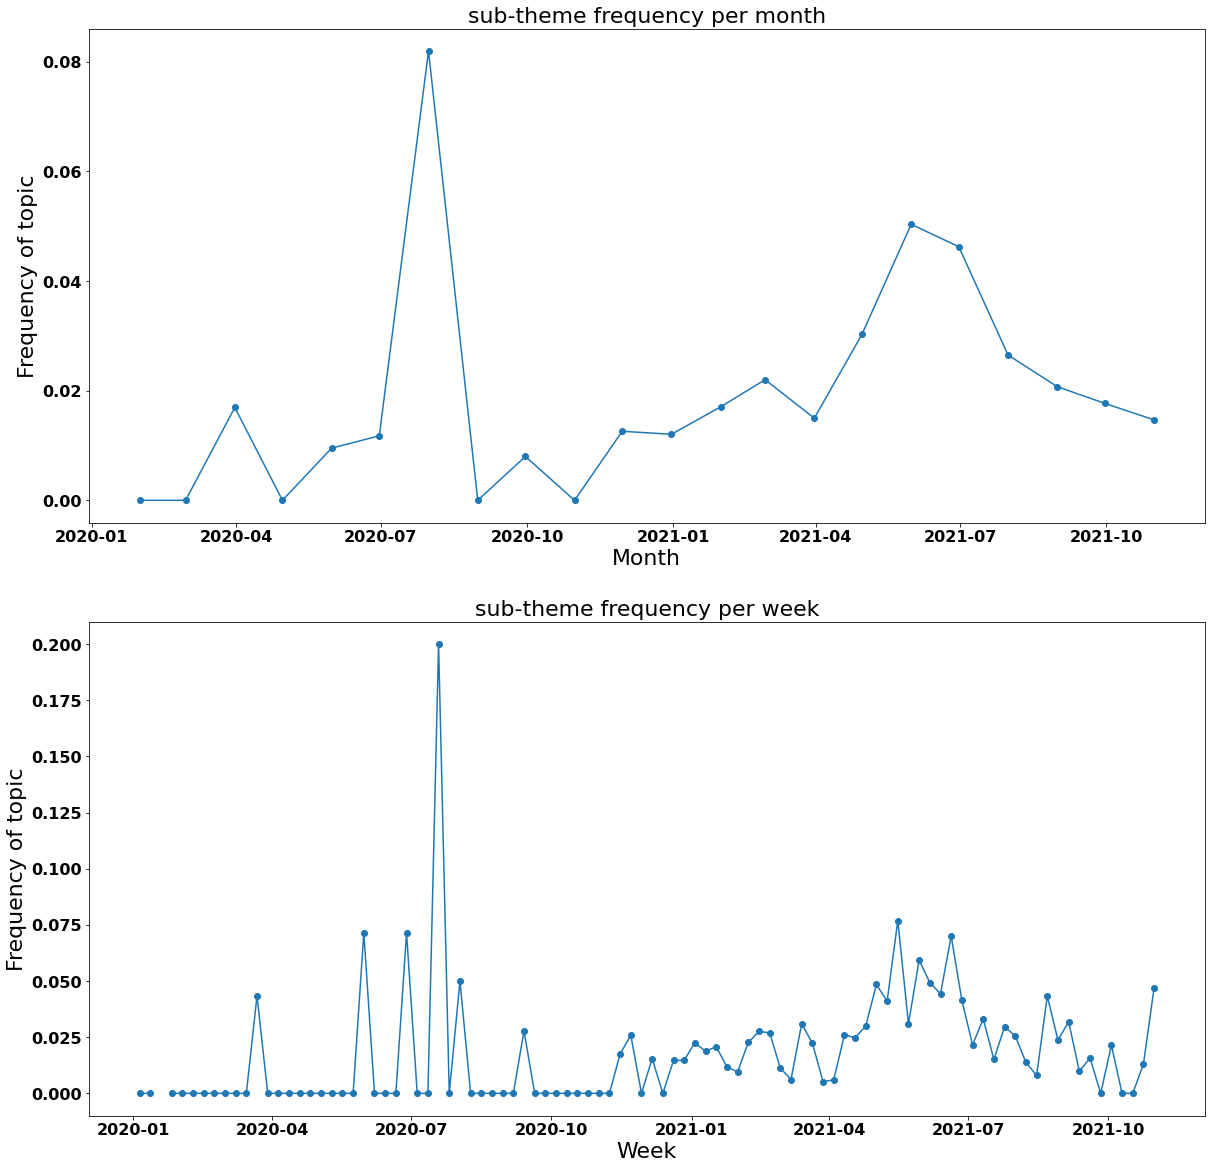

In [39]:
frequency_topics(df_sub,olympics)

SAMPLES OF POSITIVE SENTENCES
The Olympics are expected to welcome around 11,000 athletes.
Invited to enter the European hemicycle alongside Commission President Ursula von der Leyen, Italian fencer Beatrice Vio, who won the Tokyo Paralympic Games this summer, is endowed with the qualities Europe would need in the post-Covid era.
SAMPLES OF NEGATIVE SENTENCES
Japanese Prime Minister Yoshihide Suga announced on Monday that his government was "considering" a new state of emergency in the Greater Tokyo area because of the increase in contamination, calling the country's health situation "very severe".
The number two of Japan's main ruling party said the Tokyo Olympics could be cancelled as a last resort, as the Japanese archipelago suffers from a sharp rise in the epidemic, local media reported on Thursday.


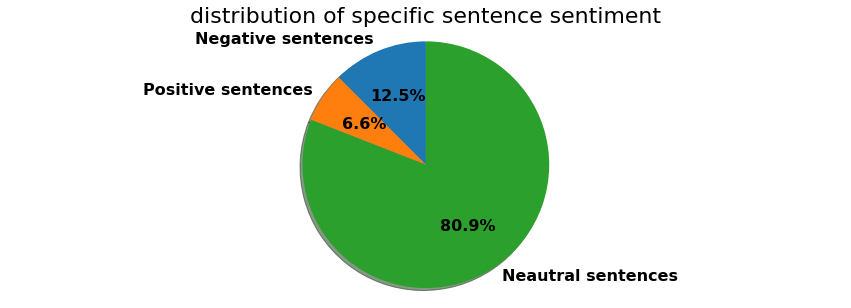

In [40]:
sentences_with_word(olympics,olympics_words)

In [41]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(olympics.list_labels[14318]) if x == 0]
for i in indices: 
    print(olympics.list_sentences[14318][i])

With just over two months to go before the opening of the Tokyo Olympics on 23 July, the health situation is not improving and the anger of the Japanese is rising.
However, there is growing protest and criticism from the public, the medical world and even some Japanese athletes.
Japan has been registering some 5,300 new cases of Covid-19 per day and a total of some 10,500 deaths since the beginning of 2020 (for 126 million people).
However, these statistics do not reflect reality, since the Japanese cannot be tested (PCR) as in France.
As a result, and despite the state of emergency that imposes the closure of bars and restaurants selling alcohol at 8pm, the virus is circulating in the country and hospitals are already saturated.
In terms of vaccination, the situation is no better.
Only the Pfizer/BioNTech vaccine is authorised in Japan for the moment and the government (which is falling in the polls) is facing growing criticism for the very slow start of its vaccination campaign and d

## COUNTRIES

In [42]:
usa_words="United States|US|Biden|Trump"
usa=df_sub[(df_sub['Title_en'].str.contains(usa_words))|(df_sub['Text_en'].str.contains(usa_words))]

In [43]:
len(usa)/len(df_sub)

0.2622345979812043

SAMPLES OF POSITIVE HEADLINES
Claire Denis, filmmaker: "The arts bring many people to life
Novavax vaccine 89% effective in clinical trials
United States: strong growth expected to return in 2021
SAMPLES OF NEGATIVE HEADLINES
Covid-19: Dunkirk and the "zero rally", half a million deaths in the United States, Guadeloupe, effects of vaccination... February 23 recap
Covid-19: a European Council concerned about the delay in vaccination and suspicious of the laboratories
Covid-19. Poor countries face vaccine shortage due to Delta variant


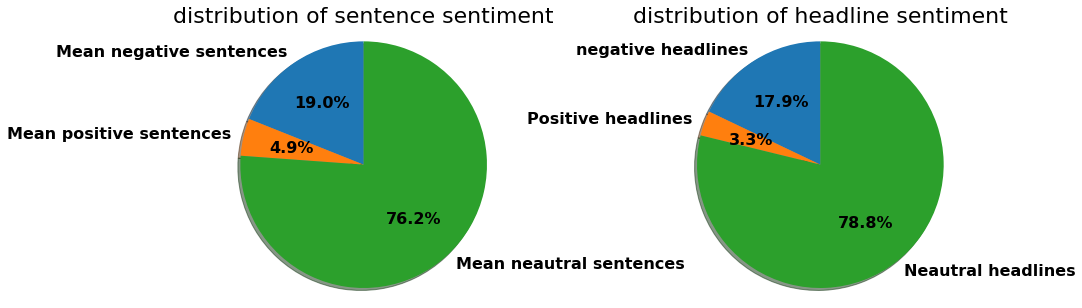

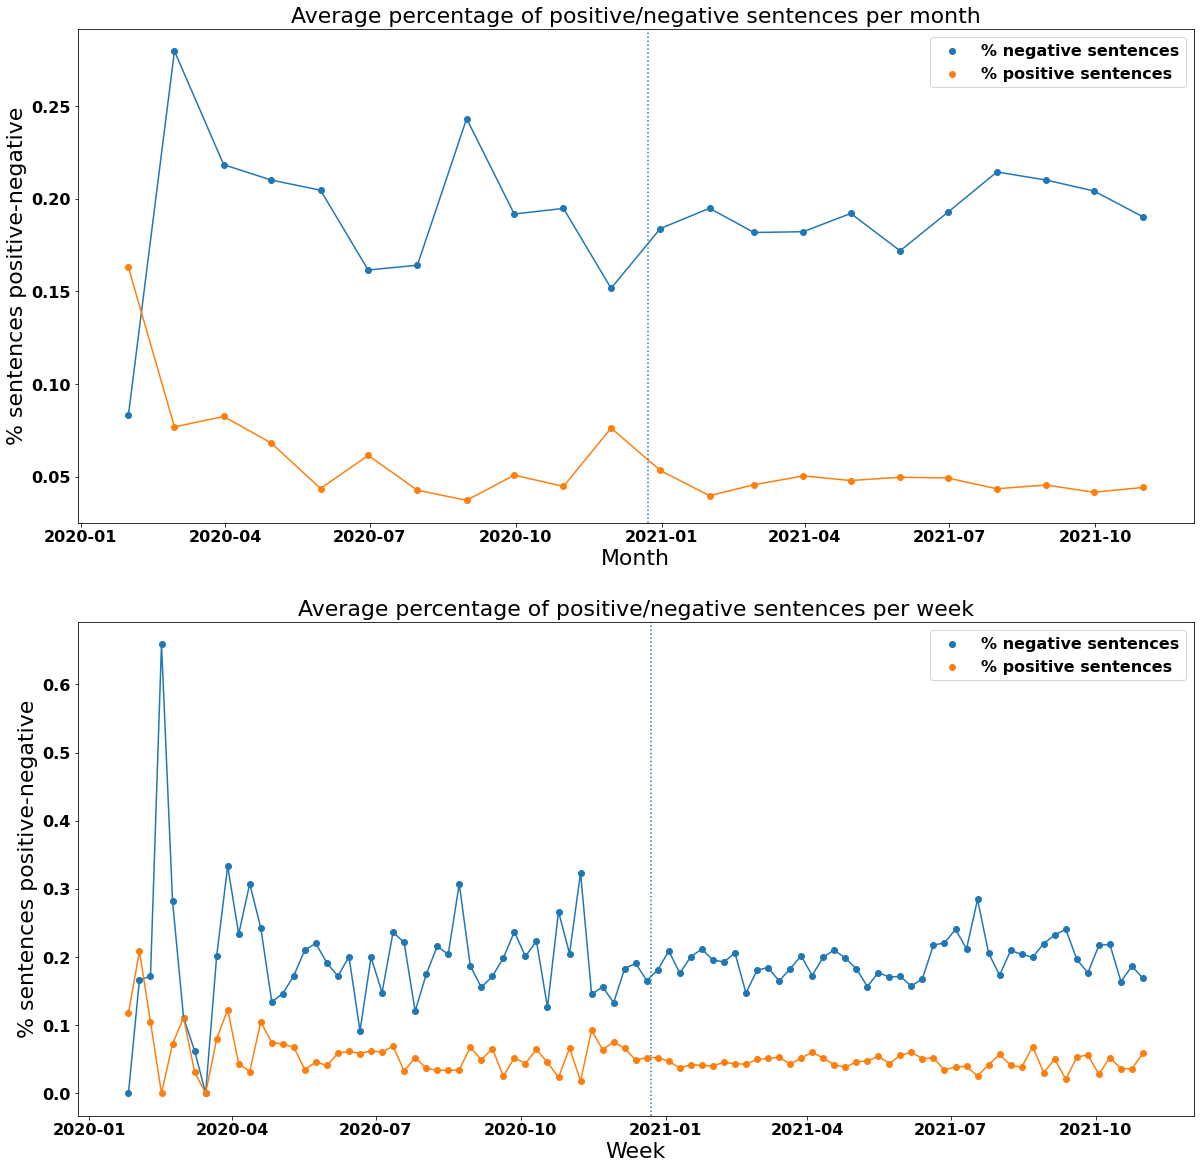

In [44]:
sentiment_analysis(usa,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


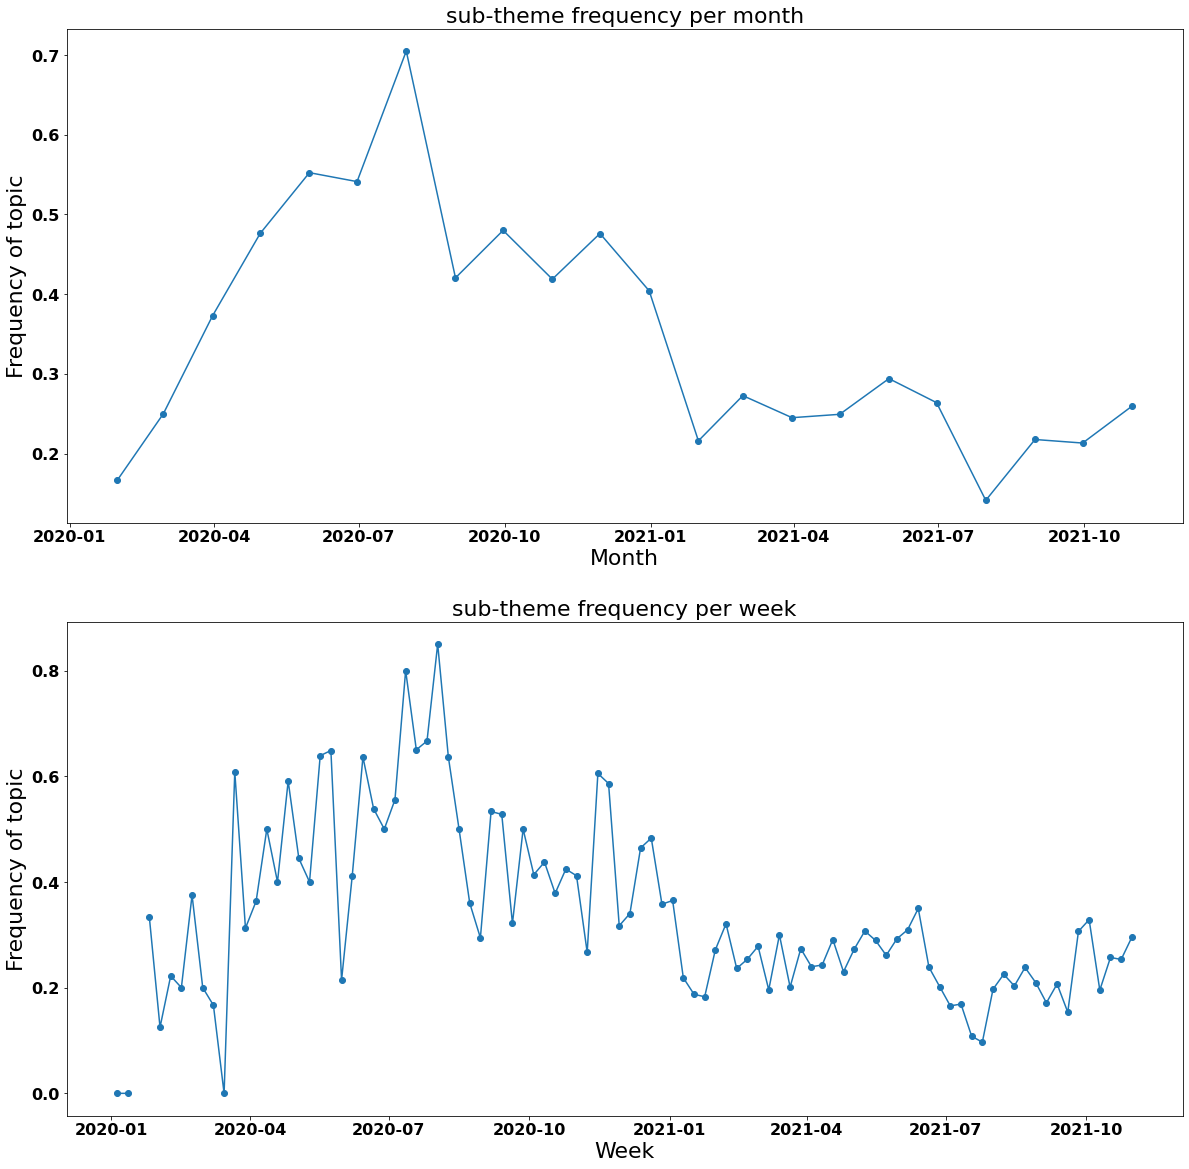

In [45]:
frequency_topics(df_sub,usa)

SAMPLES OF POSITIVE SENTENCES
The United States on Monday 23 August fully approved the Pfizer/BioNTech alliance's vaccine for people aged 16 and over, the US regulator announced, a decision that should help boost vaccination efforts in the country.
"What the markets appreciate is Joe Biden's willingness to invest, particularly in infrastructure," says Wilfrid Galand.
SAMPLES OF NEGATIVE SENTENCES
Instead of facing reality and taking into account the suffering of his fellow citizens, Jair Bolsonaro has so far indulged in a devious denial that even Boris Johnson and Donald Trump have finally abandoned.
A health program, which the Trump administration has refused to put in place, that protects people until we have the vaccines and treatments we need.


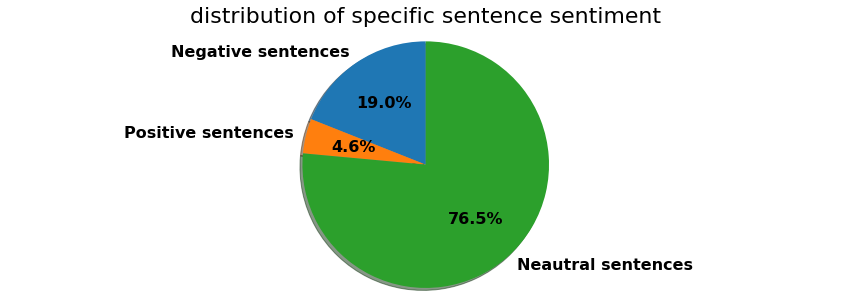

In [46]:
sentences_with_word(usa,usa_words)

In [47]:
russia_words="Russia|Moscow|Putin"
russia=df_sub[(df_sub['Title_en'].str.contains(russia_words))|(df_sub['Text_en'].str.contains(russia_words))]
len(russia)/len(df_sub)

0.08235294117647059

SAMPLES OF POSITIVE HEADLINES
Coronavirus: Russian vaccine shows encouraging results
Covid: encouraging results for AstraZeneca's vaccine
Covid-19: teachers' unions happy to be vaccinated soon
SAMPLES OF NEGATIVE HEADLINES
Influencers approached to criticise Pfizer: "Shabby" and "dangerous", says Olivier Véran
Covid-19: Gabriel Attal warns of a "situation so fragile that anything can turn it upside down
Facebook's response to the flood of anti-vaccination messages was misdirected


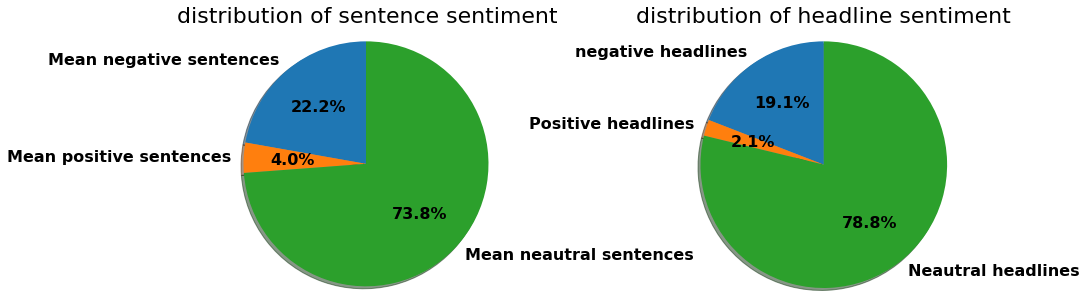

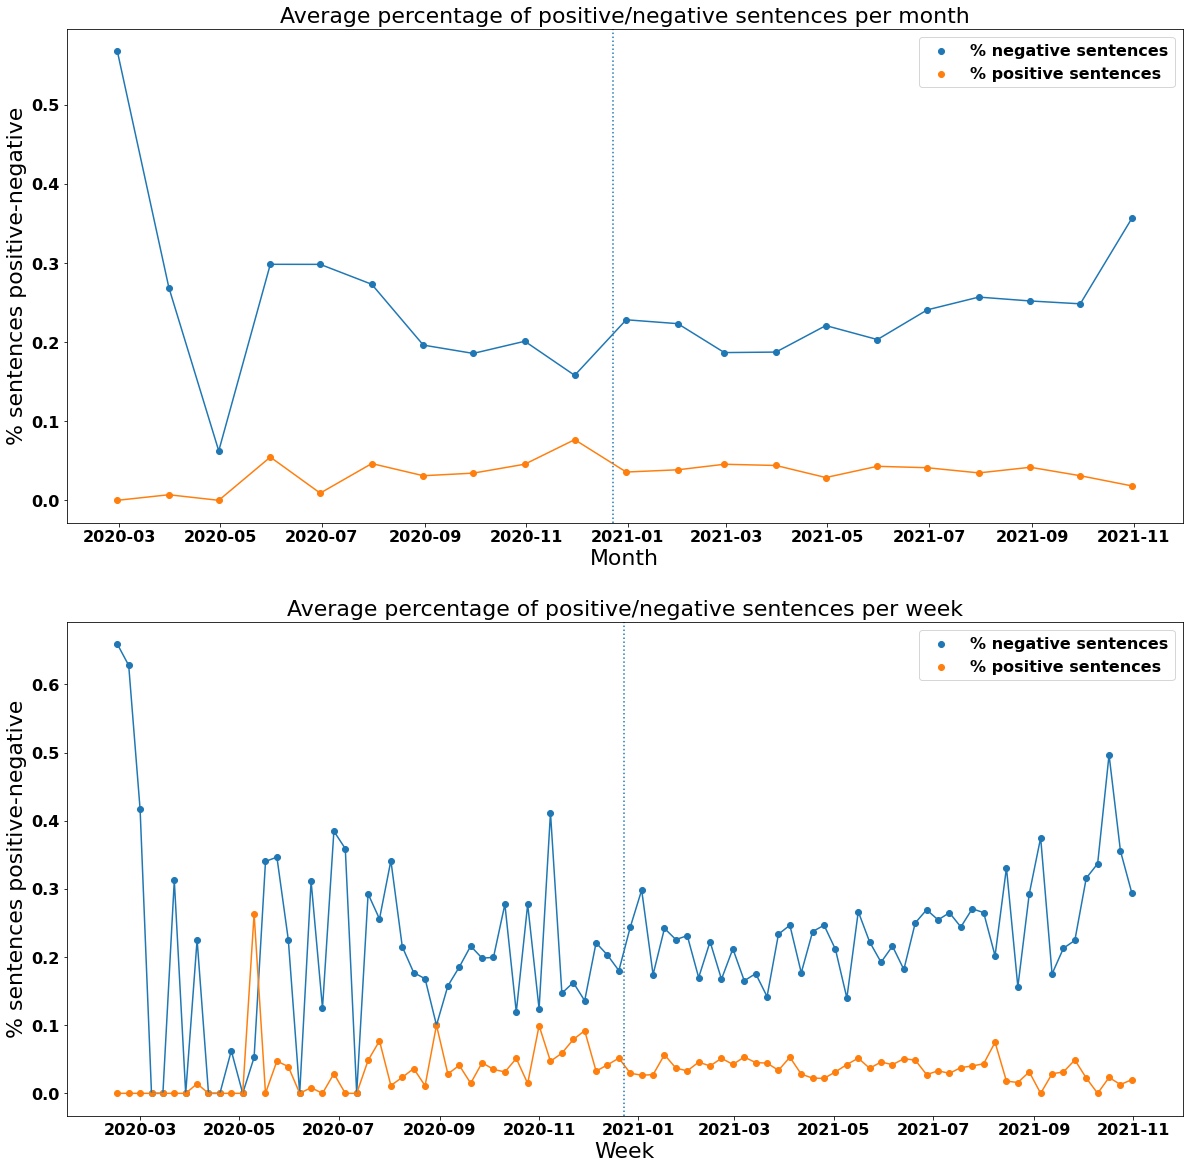

In [48]:
sentiment_analysis(russia,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


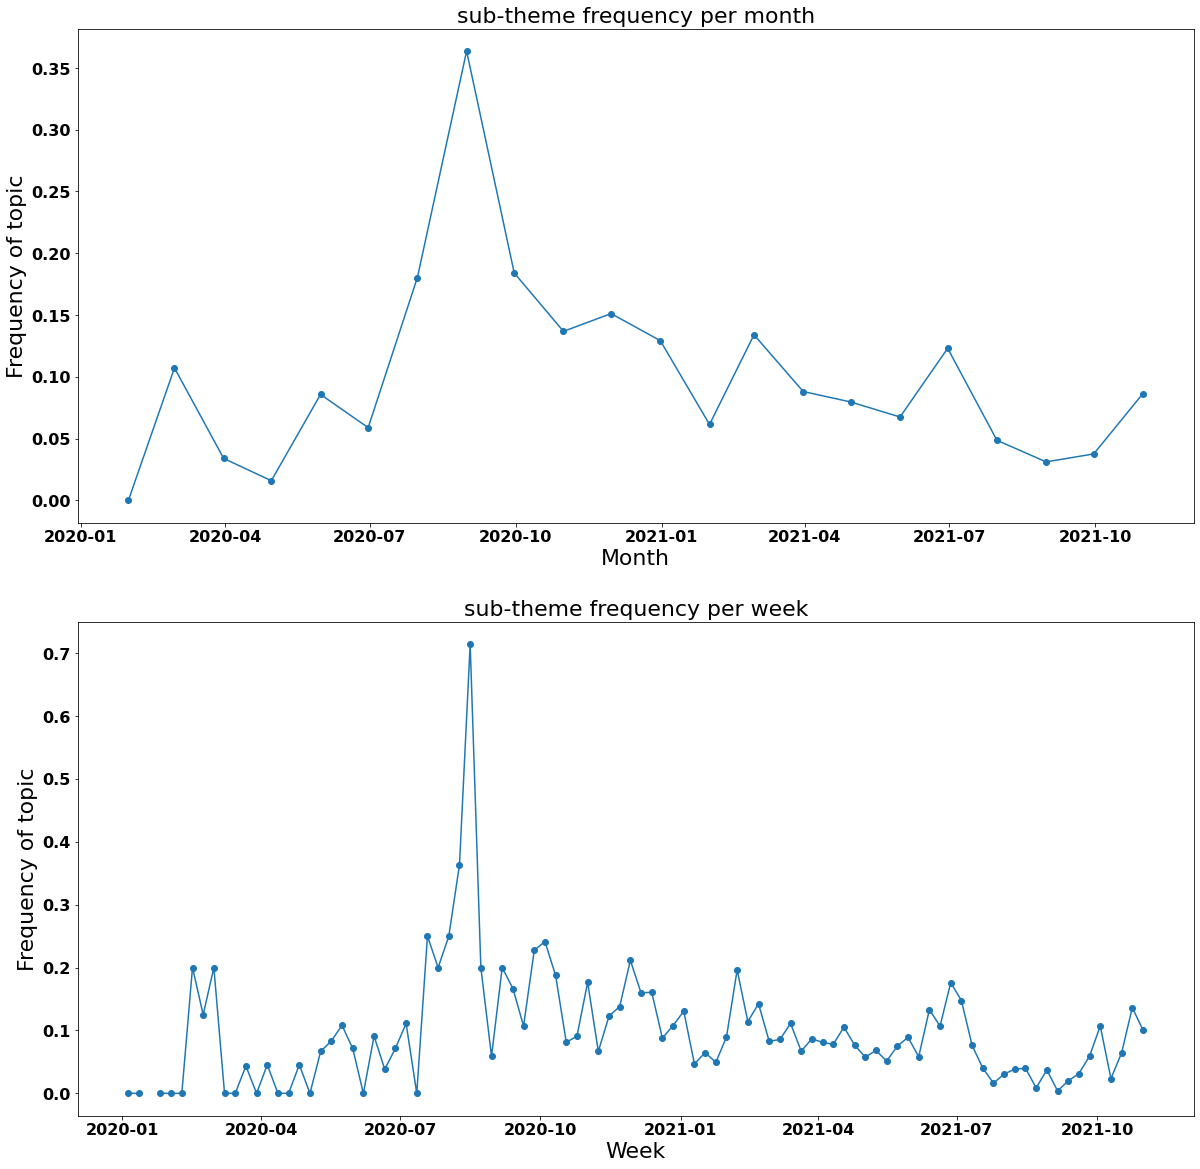

In [49]:
frequency_topics(df_sub,russia)

SAMPLES OF POSITIVE SENTENCES
Russia was the first country, however, to announce an effective vaccine against Covid-19, Sputnik V, in the summer of 2020.
"For the first time in the world, a vaccine against the new coronavirus has been registered," the Russian president said on Tuesday, adding: "I know that it is quite effective, that it gives lasting immunity.
SAMPLES OF NEGATIVE SENTENCES
>Russia reports 26,097 cases and 562 deaths in 24 hours Russia reported 26,097 new infections on Tuesday, including 5,232 in the capital Moscow, bringing the total to 2,515,009 cases.
The Russian statistics agency Rosstat, which has a broader definition, reports more than 300,000 deaths by the end of June 2021.


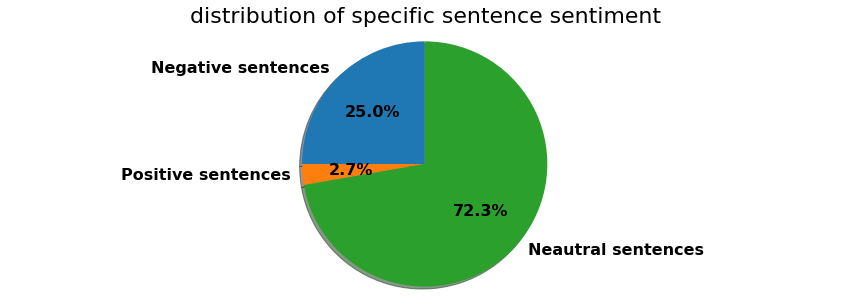

In [50]:
sentences_with_word(russia,russia_words)

In [51]:
india_words="India|Dheli"
india=df_sub[(df_sub['Title_en'].str.contains(india_words))|(df_sub['Text_en'].str.contains(india_words))]
len(india)/len(df_sub)

0.09850330664810303

SAMPLES OF POSITIVE HEADLINES
Variant Delta: two doses of Pfizer or AstraZeneca more than 90% effective against hospitalisation
The delta wave? Get ready, it's going to rock!
Eight reasons to believe in the economic rebound in 2021
SAMPLES OF NEGATIVE HEADLINES
Covid-19. "High probability" of new "possibly more dangerous" variants according to WHO
Covid-19: the headache of false PCR tests
Brazil's Covid-19 vaccination gets off to a bad start


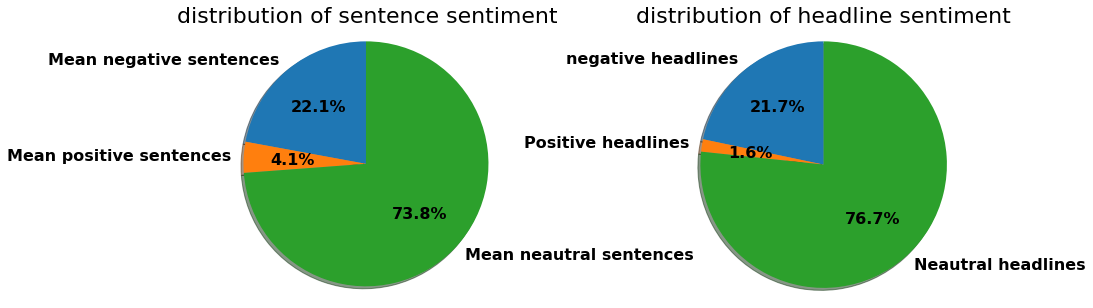

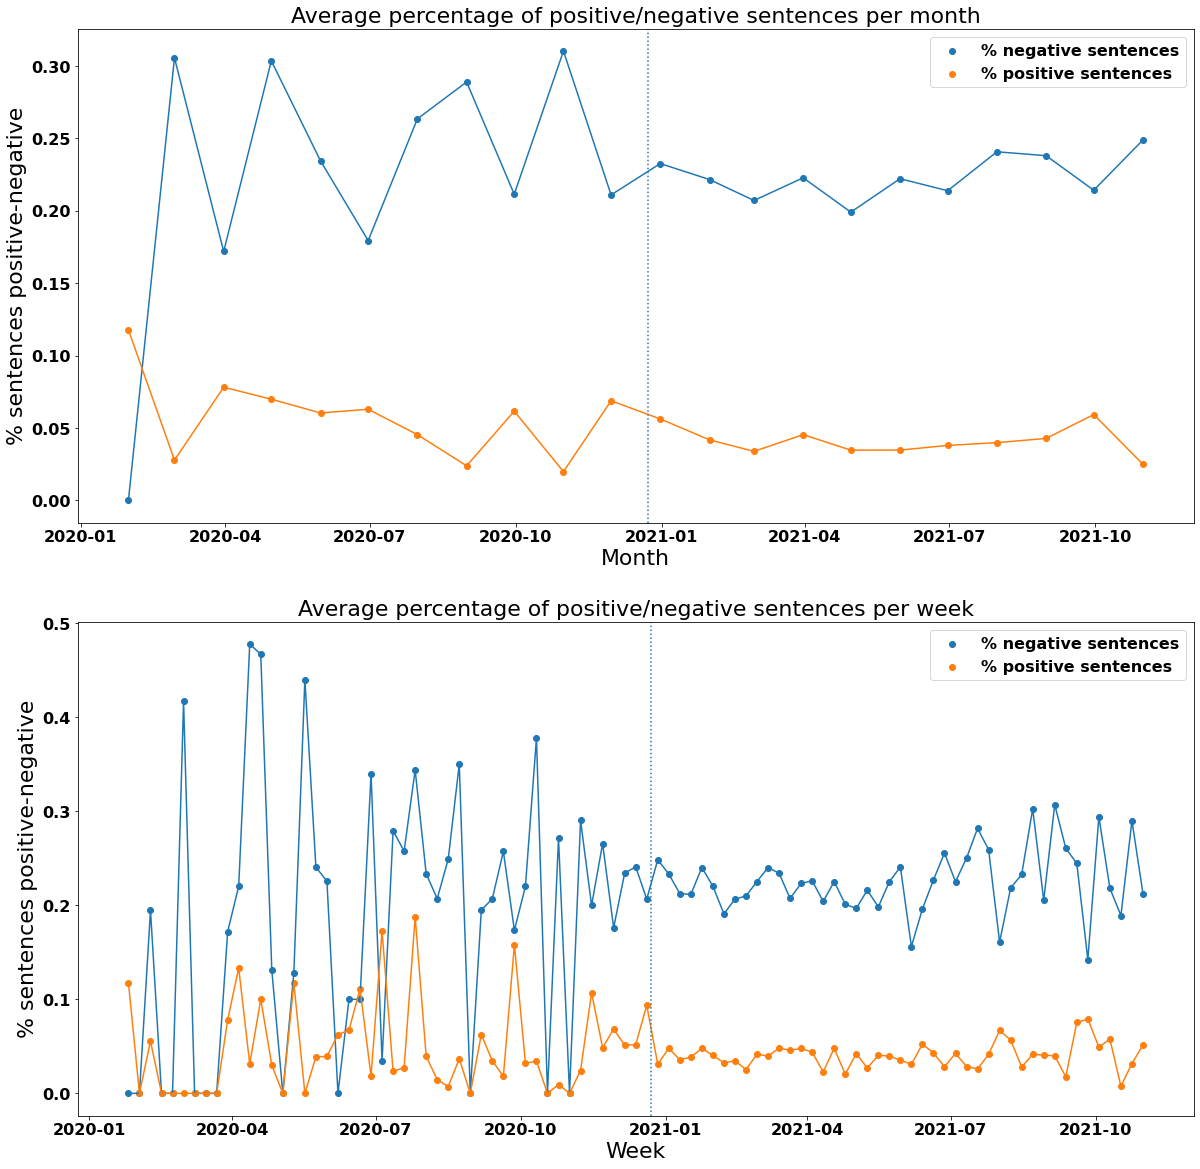

In [52]:
sentiment_analysis(india,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


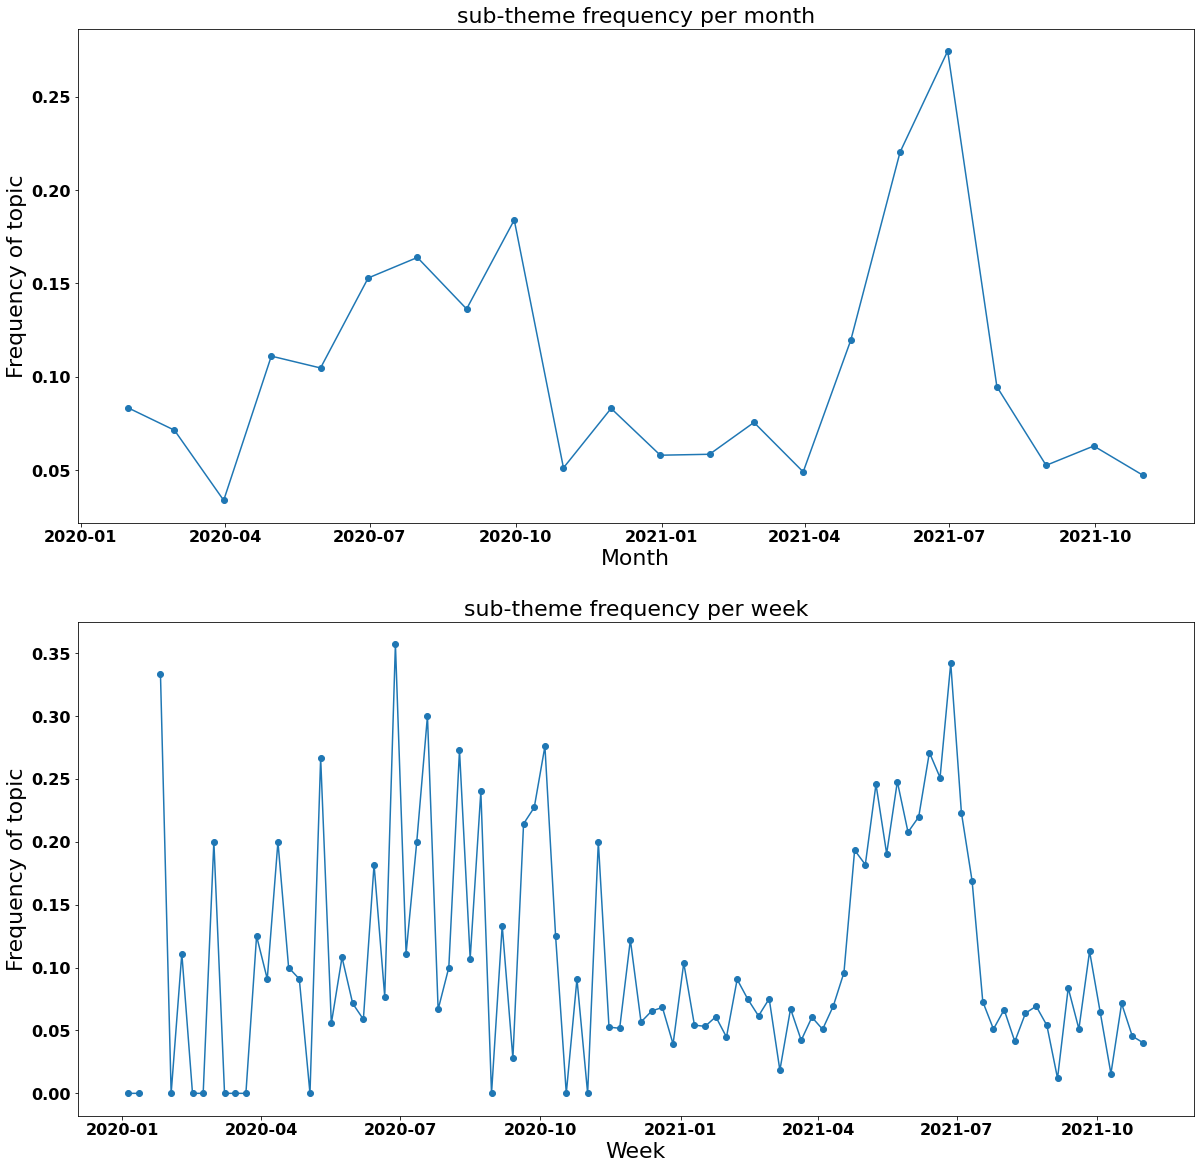

In [53]:
frequency_topics(df_sub,india)

SAMPLES OF POSITIVE SENTENCES
India could also take advantage of the logistical network used during the general elections, the largest in the world.
Infectious diseases specialist Benjamin Davido, who works at the Raymond-Poincaré hospital in Garches, near Paris, is nevertheless reassuring: as long as barrier measures are respected, there is no reason for the variant from India to spoil the holidays.
SAMPLES OF NEGATIVE SENTENCES
India: electoral setback for Narendra Modi in West Bengal Shaifali's entire family is affected by Covid-19, and the ordeal of survival is replayed every day to find vital medical resources on the black market.
India, ravaged by a resurgence of the virus due to the Delta variant, is experiencing the sharpest slowdown in its economic outlook, with growth expected at 9.5% (-3 points).


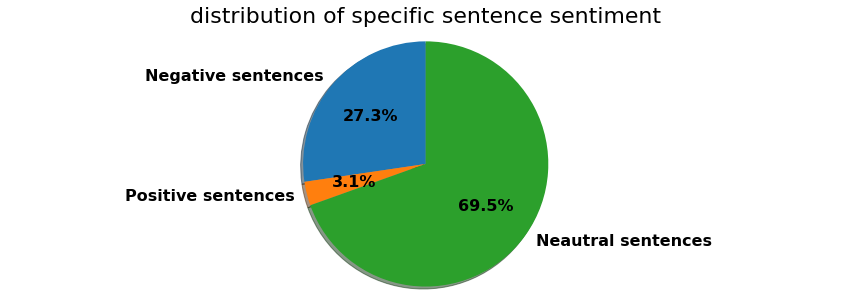

In [54]:
sentences_with_word(india, india_words)

In [11]:
france_words="Macron|Buzyn|Véran"
france=df_sub[(df_sub['Title_en'].str.contains(france_words))|(df_sub['Text_en'].str.contains(france_words))]
len(france)/len(df_sub)

0.24838148277062305

SAMPLES OF POSITIVE HEADLINES
The English variant, Cesar for the best foreign virusContent reserved for subscribers
Covid-19. First dose of vaccine more effective than expected: UK bet wins?
Coronavirus: WHO leads the fight against the pandemic
SAMPLES OF NEGATIVE HEADLINES
Vaccination against Covid-19 in French Guiana: Olivier Véran castigates Christiane Taubira's "cowardice
Covid-19: the government wants to make ten days' isolation mandatory for anyone who tests positive
"Vaccines: what if Europe wasn't there?


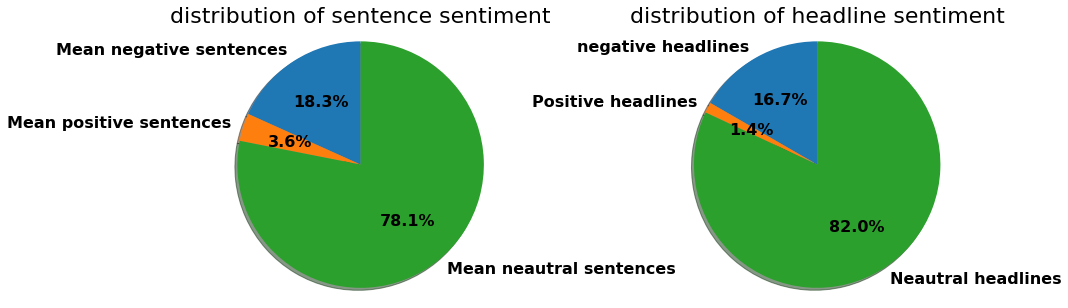

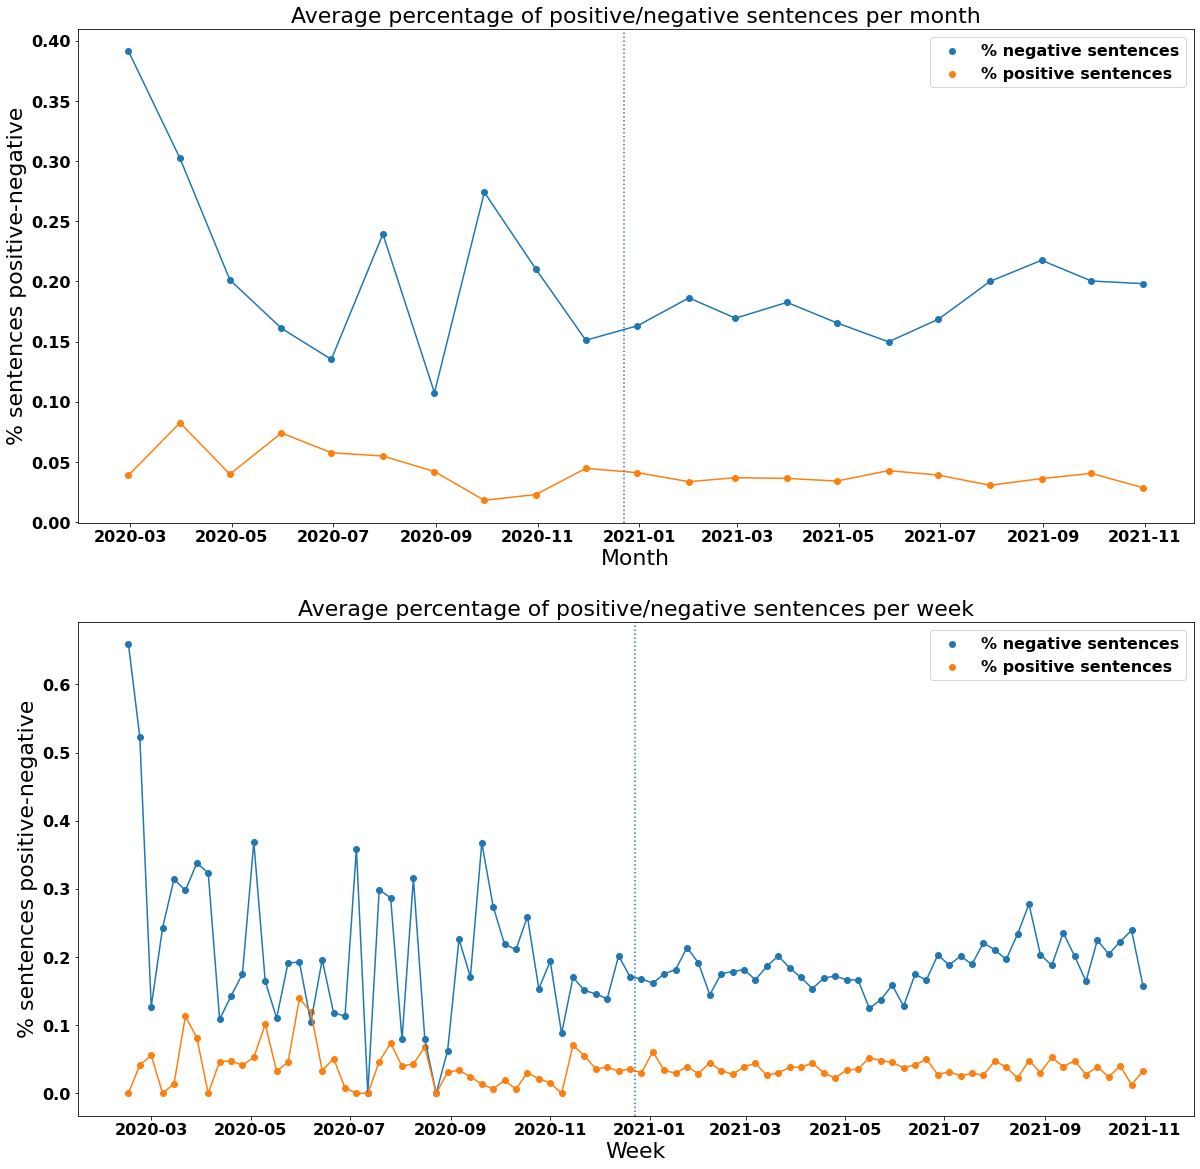

In [12]:
sentiment_analysis(france,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


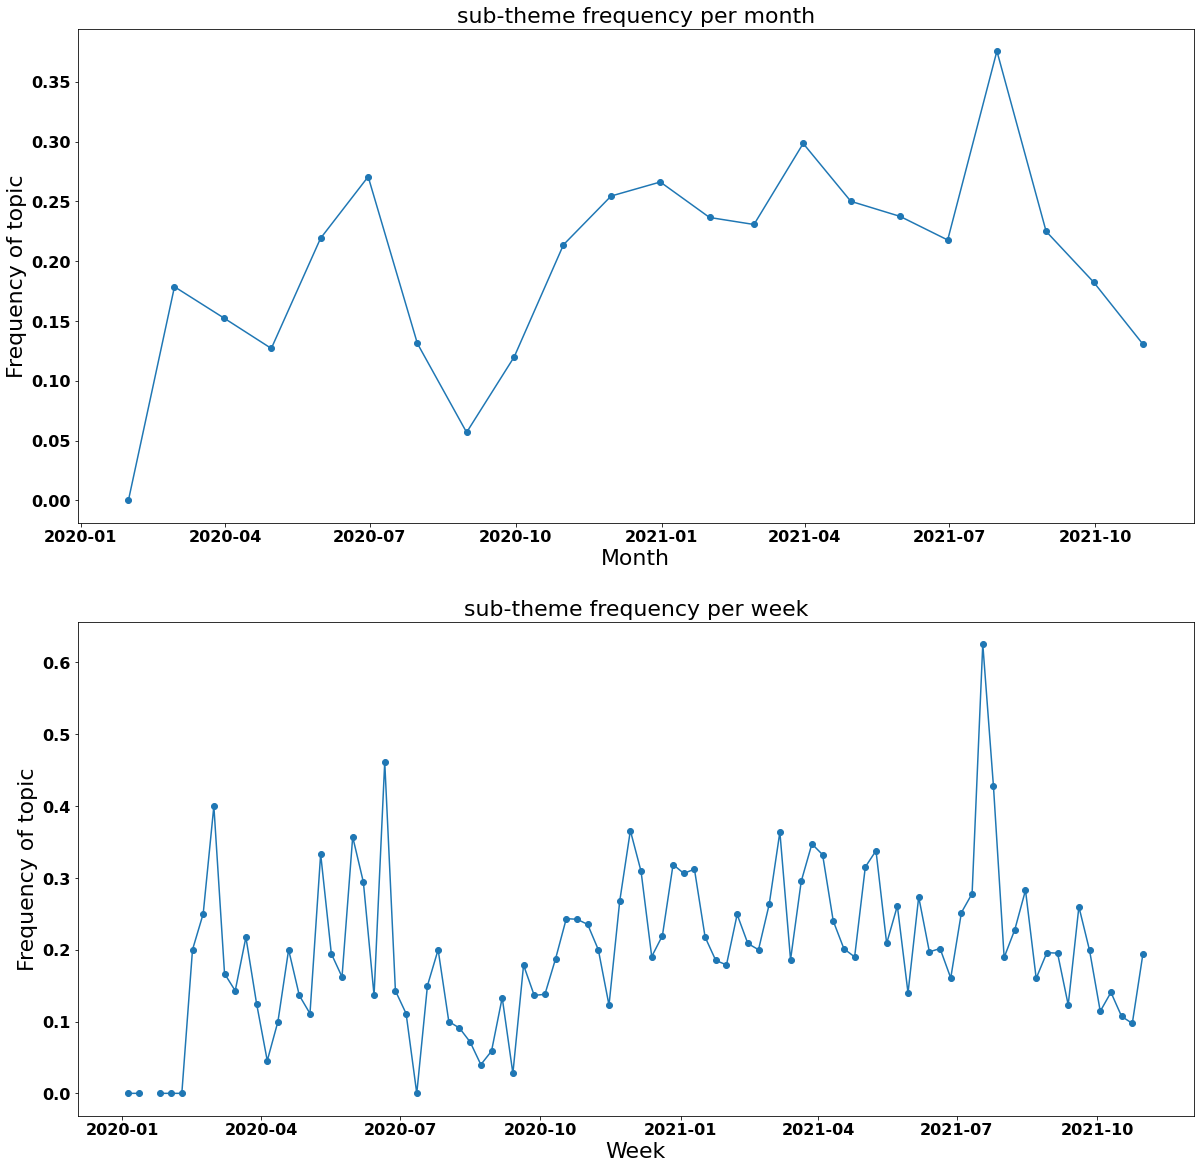

In [13]:
frequency_topics(df_sub,france)

SAMPLES OF POSITIVE SENTENCES
I defended this position to Olivier Véran, who integrated it into the vaccination strategy, which I welcome.
"Let's reaffirm clearly what we want to do and let's commit to this being our first reform of Emmanuel Macron's second five-year term," Ferrand added.
SAMPLES OF NEGATIVE SENTENCES
In total, Olivier Véran said on Wednesday 13 October that 15,000 healthcare workers had been suspended.
At the start of the press conference, Olivier Véran recalled that "one million doses of vaccine have been administered", specifying that "France was at the head of the European pack in terms of vaccination rate".


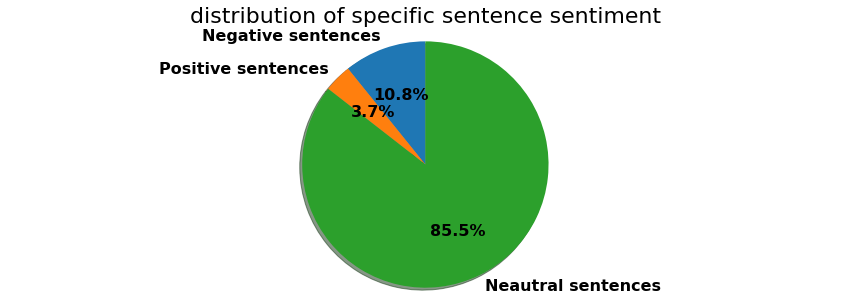

In [58]:
sentences_with_word(france, france_words)

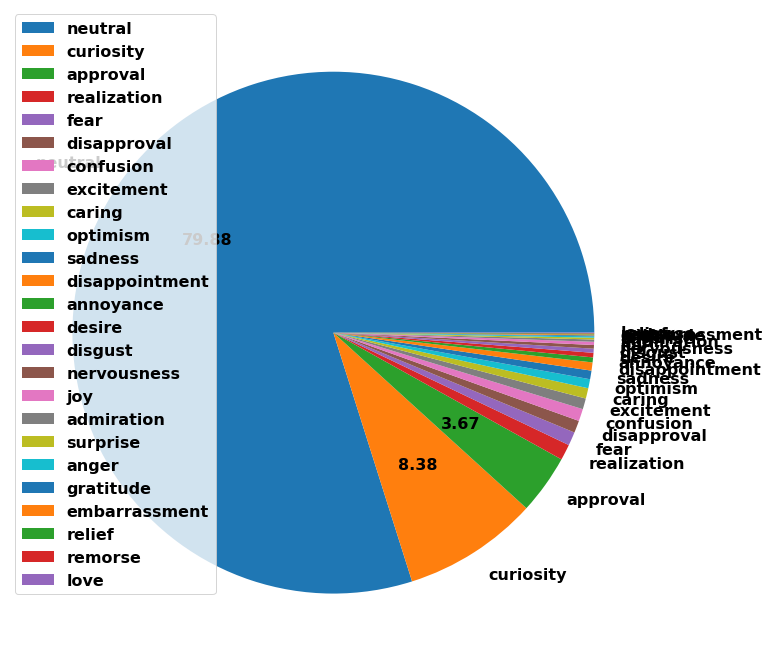

In [14]:
plot_emotions(france)

In [15]:
france

Title_en  \
0      How many people under 50 have already been vac...   
1      Covid-19. Vaccines, ski resorts, restaurants.....   
4      Covid-19. Drop in critical care patients and i...   
9      Covid-19. Jean Castex "urges" the over-55s to ...   
11     Covid-19. From 60 to 120 million, France will ...   
...                                                  ...   
14493  Covid tests: government confirms end of reimbu...   
14496  Covid-19: extended lockdown in Dunkirk, slow i...   
14503  Covid-19: health pass validated, 3rd dose of v...   
14504  Covid-19: military hospitals mobilised to vacc...   
14505                                         On the key   

                                                 Text_en  \
0      It was a decision awaited by many 18-49 year o...   
1      A new press conference to give "visibility", a...   
4      Drop in Covid critical care patients. As Franc...   
9      Prime Minister Jean Castex called on Saturday ...   
11     Double or nothing. France will give poor count...   
...                                                  ...   
14493  Jean Castex confirmed on Sunday 26 October the...   
14496  The weekend lockdown that came into effect in ...   
14503  The law introducing the health pass and compul...   
14504  Seven of the eight army training hospitals (HI...   
14505  For anyone considering a political comeback, t...   

                                    Authors        Date  \
0                          Maxime MAINGUET.  2021-05-27   
1                                     error  2021-01-07   
4      Philippe MATHÉ et Valentin DAVODEAU.  2021-05-04   
9                                 avec AFP.  2021-05-08   
11                                avec AFP.  2021-09-25   
...                                     ...         ...   
14493                  La Croix (avec AFP),  2021-09-27   
14496                  La Croix (avec AFP),  2021-03-09   
14503                  La Croix (avec AFP),  2021-08-05   
14504                      Corinne Laurent,  2021-04-06   
14505                       Jérôme Chapuis,  2021-03-27   

                                                    Link     Newspaper  \
0      https://www.ouest-france.fr/sante/vaccin/combi...  Ouest France   
1      https://www.ouest-france.fr/sante/virus/corona...  Ouest France   
4      https://www.ouest-france.fr/sante/virus/corona...  Ouest France   
9      https://www.ouest-france.fr/sante/vaccin/covid...  Ouest France   
11     https://www.ouest-france.fr/sante/vaccin/covid...  Ouest France   
...                                                  ...           ...   
14493  https://www.la-croix.com/Sciences-et-ethique/T...      La Croix   
14496  https://www.la-croix.com/Sciences-et-ethique/C...      La Croix   
14503  https://www.la-croix.com/Sciences-et-ethique/C...      La Croix   
14504  https://www.la-croix.com/France/Covid-19-hopit...      La Croix   
14505  https://www.la-croix.com/Debats/touche-2021-03...      La Croix   

      sentiment_title                                     list_sentences  \
0             Neutral  ['It was a decision awaited by many 18-49 year...   
1             Neutral  ['A new press conference to give "visibility",...   
4            Negative  ['Drop in Covid critical care patients.', 'As ...   
9             Neutral  ['Prime Minister Jean Castex called on Saturda...   
11            Neutral  ['Double or nothing.', 'France will give poor ...   
...               ...                                                ...   
14493         Neutral  ['Jean Castex confirmed on Sunday 26 October t...   
14496         Neutral  ['The weekend lockdown that came into effect i...   
14503         Neutral  ['The law introducing the health pass and comp...   
14504         Neutral  ['Seven of the eight army training hospitals (...   
14505         Neutral  ['For anyone considering a political comeback,...   

                                             list_labels Country  \
0      [1, 1, 1, 1, 1, 1, 1

In [31]:
pd.options.display.max_colwidth = 100
france[france['emotion_transformers_1']=="annoyance"]

Title_en  \
2952        Covid-19. Eight sentences about the epidemic that these politicians and scientists must regret   
2964                  "Absurd", "segregation", "sprint": heated debates on the health pass in the Assembly   
4775                           Being infected to get a health pass? "It's stupid," says one epidemiologist   
5976         "Before Macron's intervention, there was nobody in our vaccination centre. Now it's madness".   
6825                                    Covid-19: employers increasingly annoyed by government injunctions   
8071                                  Coronavirus: "What annoys me most today is the lack of information".   
8567   Vaccination to be accelerated, impeachment procedure "ridiculous" according to Trump, League 1 r...   
9051                           Enhanced protocols in schools: "What already exists is difficult to apply".   
9541   "We don't listen to the authorities anymore": in newly confined Fort-de-France, mistrust is at i...   
9647                   Vaccination: "We feel like we're making fools of ourselves in front of our patients   
11969  Excluding the coronavirus, the number of people who do not seek care is reaching alarming propor...   

                                                                                                   Text_en  \
2952   11January 2020. Covid-19 claims its first life in Wuhan, China, four days after the identificati...   
2964   "It is true that we have worked in difficult circumstances, quickly. But take your time, the vir...   
4775   "Epidemiologist Catherine Hill has no shortage of adjectives to describe the new idea circulatin...   
5976   Since the Head of State announced on 12 July the extension of the health pass to go to the café,...   
6825   Employers are having a hard time digesting the latest government announcements to combat Covid-1...   
8071   Elodie* is a general practitioner in Haute-Loire. She tells us about her daily life between lack...   
8567   Campaign. Questioned on the vaccination strategy by the National Assembly's social affairs commi...   
9051   No question of closing schools. The Minister of Health, Olivier Véran, reaffirmed this on Thursd...   
9541   In the twilight, you can only see him. There, in the heart of downtown Fort-de-France, the curfe...   
9647   Alice Perrain admits it straight out: France's suspension of AstraZeneca's vaccines on Monday af...   
11969  From the Minister of Health, Olivier Véran, to the Director General of Health, Jérôme Salomon, a...   

                                                    Authors        Date  \
2952                                      Jennifer CHAINAY.  2021-01-11   
2964                                  Léa MORILLON avec AFP  2021-07-22   
4775                                       Maxime FETTWEIS.  2021-07-31   
5976              Par Stéphane Mandard et Delphine Roucaute  2021-07-20   
6825   Par Raphaëlle Besse Desmoulières et Bertrand Bissuel  2021-03-25   
8071                                      par Olivier Monod  2020-03-26   
8567                              par  LIBERATION, avec AFP  2021-01-12   
9051                                   par Cécile Bourgneuf  2021-03-26   
9541     par Anaïs Moran, Envoyée spéciale à Fort-de-France  2021-07-31   
9647                                    par Juliette Delage  2021-03-16   
11969                                      Solveig Godeluck  2020-04-16   

                                                                                                      Link  \
2952   https://www.ouest-france.fr/sante/virus/coronavirus/covid-19-huit-phrases-sur-l-epidemie-que-ces...   
2964   https://www.ouest-france.fr/sante/virus/coronavirus/pass-sanitaire/absurde-segregation-sprint-de...   
4775   https://www.ouest-france.fr/sante/virus/coronavirus/pass-sanitaire/etre-contamine-pour-decrocher...   
5976   https://www.lemonde.fr/planete/article/2021/07/20/centres-de-vaccination-avant-l-intervention-du...   
6825 

## VACCINES

SAMPLES OF POSITIVE HEADLINES
AstraZeneca's vaccine is "safe and effective", says European Medicines Agency
Despite Covid setbacks, AstraZeneca is on a growth trajectoryContent reserved for subscribers
Nouvelle-Aquitaine. Covid-19: AstraZeneca's game-changing vaccine
SAMPLES OF NEGATIVE HEADLINES
Covid-19: EU threatens to block exports of AstraZeneca vaccine
AstraZeneca vaccine. More than 1,100 doses rejected in Nord-Pas-de-Calais centres
Guillain-Barré syndrome listed as "very rare" side effect of AstraZeneca vaccine


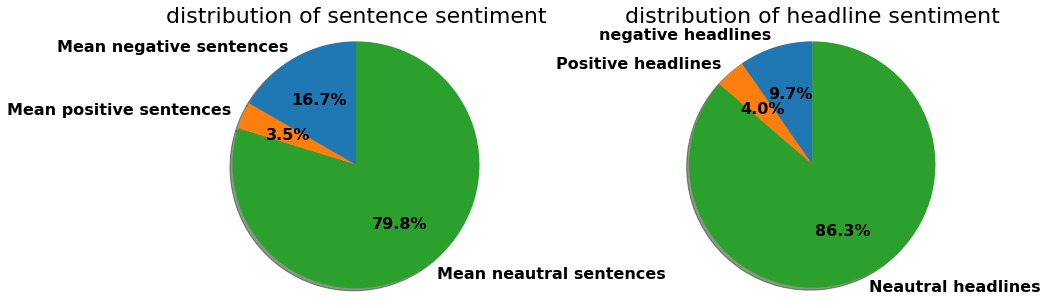

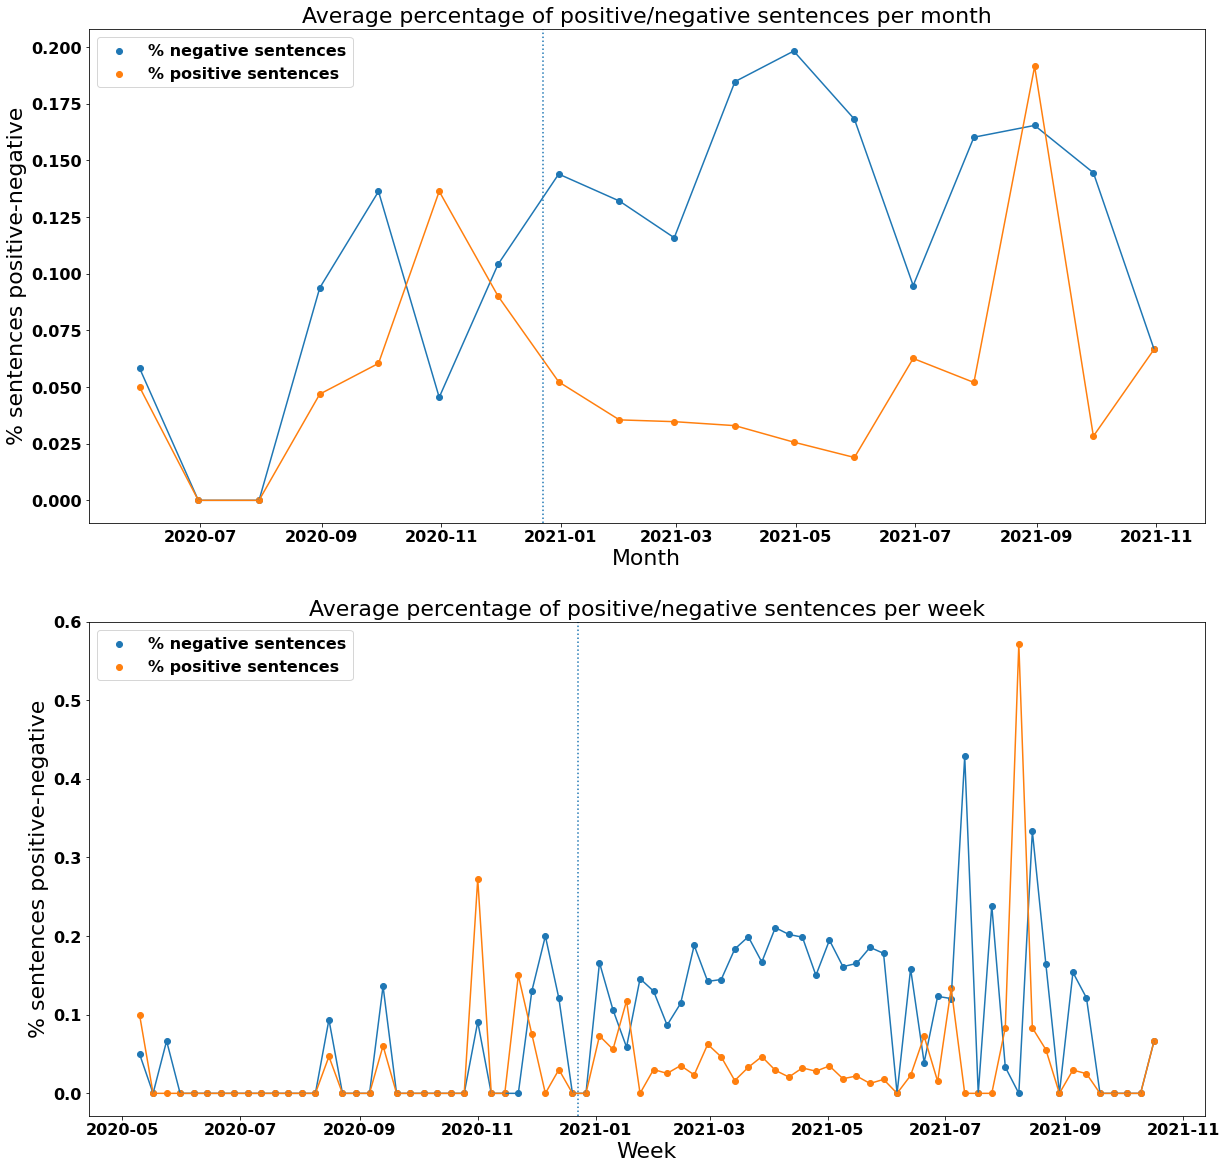

0.040236686390532544

In [59]:
astrazeneca_h=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))&(~df_sub['Title_en'].str.contains("Pfizer|Moderna"))]
sentiment_analysis(astrazeneca_h,'2020-12-23')
len(astrazeneca_h)/len(df_sub)

In [60]:
astrazeneca_h_t=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))|(df_sub['Text_en'].str.contains("Astrazeneca|AstraZeneca"))]

SAMPLES OF POSITIVE SENTENCES
Emmanuel Macron also made it clear that the Europeans were no longer relying on the AstraZeneca vaccine: "We must continue to do so (vaccinate with AstraZeneca, editor's note) because it will help us to emerge from the crisis.
"For the moment at least, it seems that AZ (AstraZeneca) is an effective vaccine, which has been reviewed by the serious regulatory authorities and approved," said Seth Berkley, head of the Gavi vaccine alliance.
SAMPLES OF NEGATIVE SENTENCES
If he is not reassured by the recent suspensions, he says he would still get the vaccine with AstraZeneca if he had the choice.
The kingdom's health authorities announced on Monday that one of the three people hospitalised a few days earlier after receiving the AstraZeneca vaccine had died.


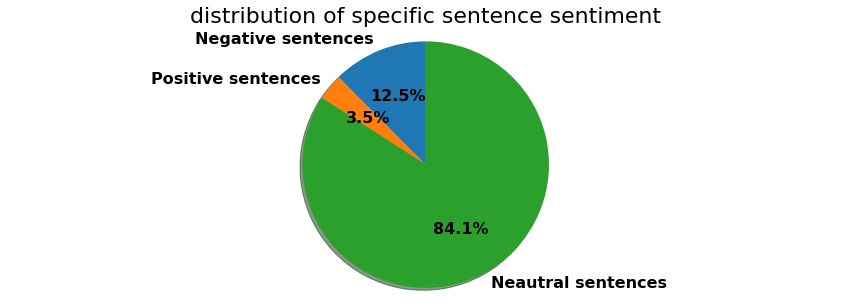

In [61]:
sentences_with_word(astrazeneca_h,'AstraZeneca')

SAMPLES OF POSITIVE HEADLINES
Covid-19: Pfizer says its vaccine is 90% effective
Pfizer and BioNTech announce that their Covid-19 vaccine is safe for 5-11 year olds
Covid: the vaccine developed by Pfizer and BioNTech is 95% effective
SAMPLES OF NEGATIVE HEADLINES
Covid-19. North Korea attempted to hack Pfizer data
Chinese vaccine Sinovac produces ten times fewer antibodies than Pfizer
Influencers approached to criticise Pfizer: "Shabby" and "dangerous", says Olivier Véran


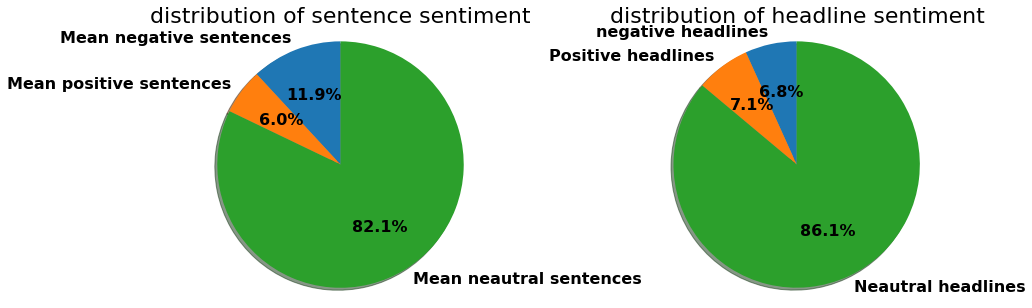

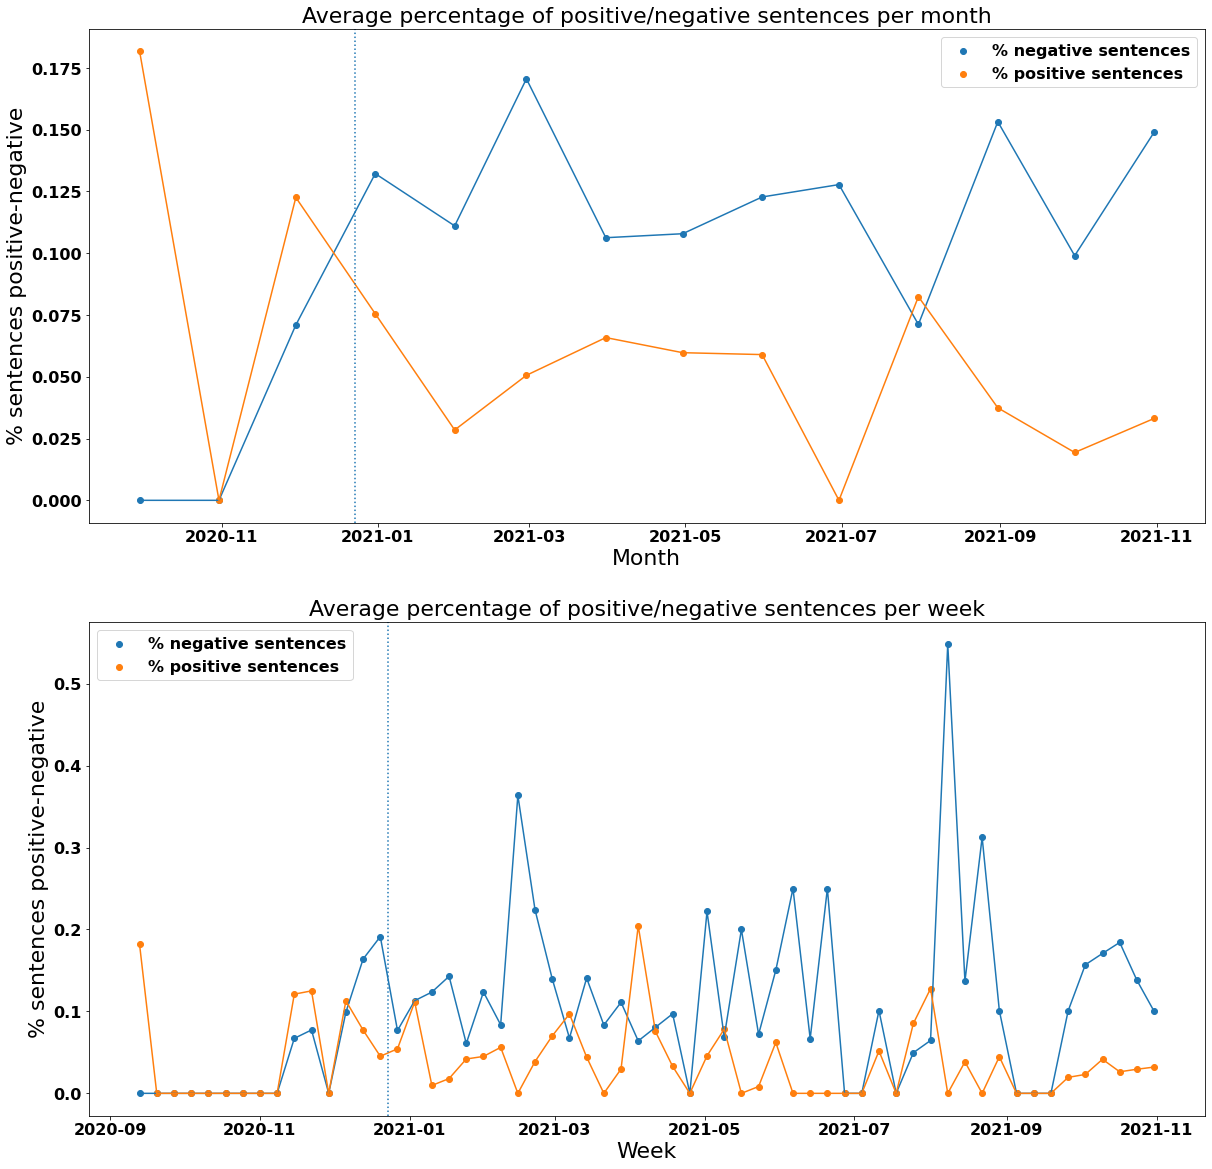

0.018517229376957885

In [62]:
pfizer_h=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Moderna"))]
sentiment_analysis(pfizer_h,'2020-12-23')
len(pfizer_h)/len(df_sub)

In [63]:
pfizer_h_t=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))|(df_sub['Text_en'].str.contains("Pfizer|pfizer"))]

SAMPLES OF POSITIVE SENTENCES
The latest Institut Pasteur study on the question is reassuring, at least for Pfizer-BioNTech's messenger RNA vaccine.
"We hope this decision will help increase confidence in our vaccine, as vaccination remains the best tool we have to protect lives," Pfizer CEO Albert Bourla said in a statement.
SAMPLES OF NEGATIVE SENTENCES
In France, the figures in the table were 386 deaths for Pfizer, 44 for AstraZeneca and none for Janssen.
Criticism of the EMEA was fuelled in early December by a hacking incident in which data on Pfizer-BioNTech and Moderna's vaccines was stolen.


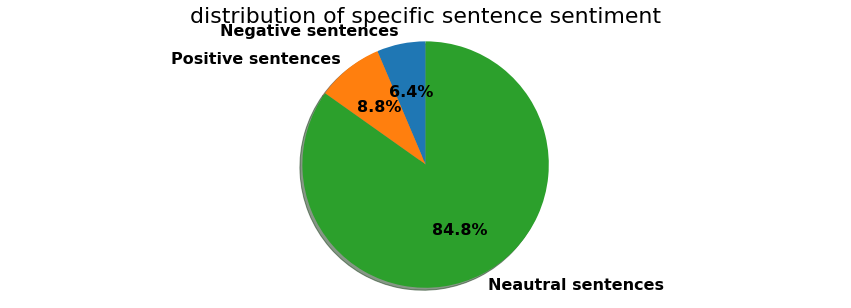

In [64]:
sentences_with_word(pfizer_h,'Pfizer')

SAMPLES OF POSITIVE HEADLINES
Covid-19: Moderna announces that its vaccine candidate is 94.5% effective
Covid-19: the pride of Recipharm employees involved in the production of the Moderna vaccine
Covid: Moderna announces positive results for its 6-11 year old vaccine
SAMPLES OF NEGATIVE HEADLINES
Moderna vaccine suspended for third doses: what's going on? We tell you
Vaccination centre vandalised, Moderna for children, New Zealand confined... The 17 August update
Serious allergic reactions to the Moderna vaccine in the US are "rare", according to health authorities


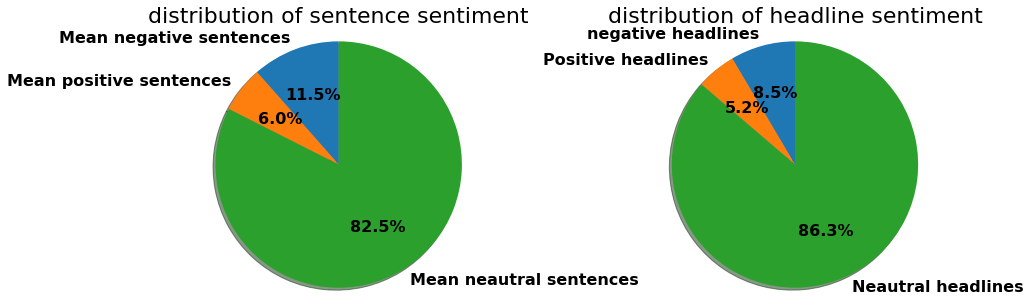

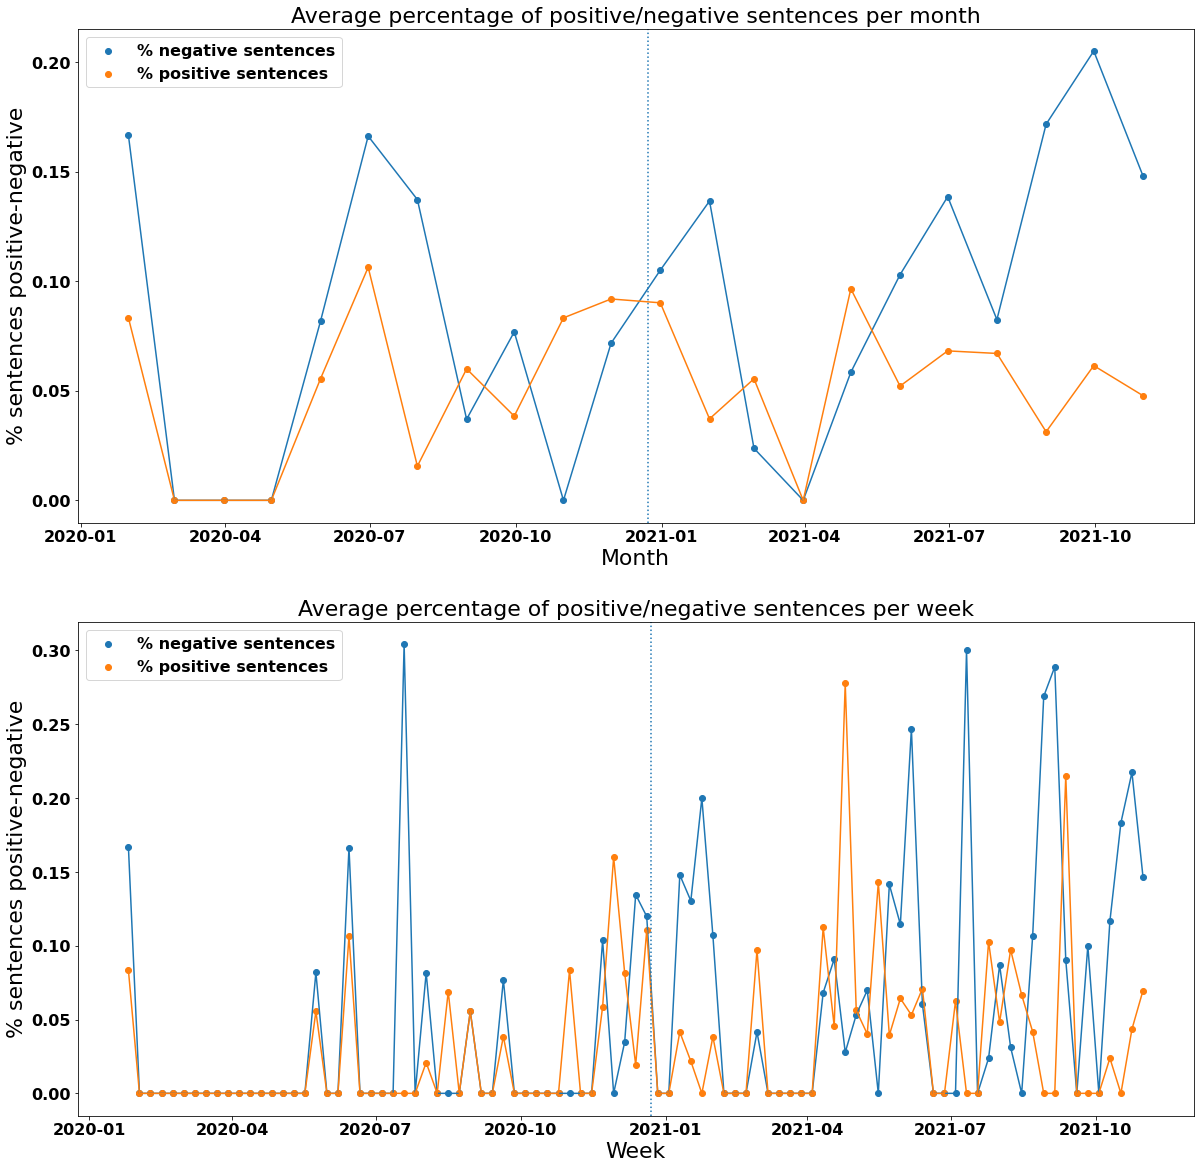

0.010650887573964497

In [65]:
moderna_h=df_sub[(df_sub['Title_en'].str.contains("Moderna|moderna"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Pfizer"))]
sentiment_analysis(moderna_h,'2020-12-23')
len(moderna_h)/len(df_sub)

In [66]:
moderna_h_t=df_sub[(df_sub['Title_en'].str.contains("Moderna"))|(df_sub['Text_en'].str.contains("Moderna"))]

SAMPLES OF POSITIVE SENTENCES
"The data could not have been better," enthused Moderna's CEO Stéphane Bancel.
If Pfizer/BioNTech's remedy had already set a record, Moderna did even better: their vaccine was approved 19 days after the official application was filed, compared to 22 for Pfizer.
SAMPLES OF NEGATIVE SENTENCES
On Friday, at 2:15 pm, she had still not received the expected Moderna doses, unlike the AstraZeneca and Jansenn vaccines that arrived the day before.
Regardless of age, the company says, based on independent studies, Moderna's vaccine is the most immunogenic.


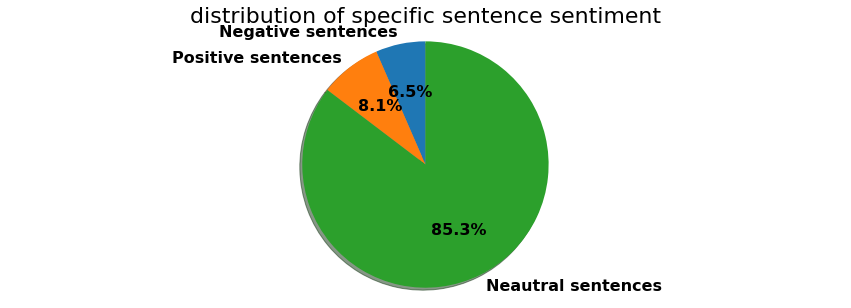

In [67]:
sentences_with_word(moderna_h,'Moderna')

# TEST EMOTION TRANSFORMERS MODELS/ LEXICON EMOTION

https://huggingface.co/arpanghoshal/EmoRoBERTa
Pros: 28 emotions, based on trasnformers model, understand context
Cons:No train with Covid-19 content. Neutral emotion?

28 emotions admiration, amusement, anger, annoyance, approval, caring, confusion, curiosity, desire, disappointment, disapproval, disgust, embarrassment, excitement, fear, gratitude, grief, joy, love, nervousness, optimism, pride, realization, relief, remorse, sadness, surprise + neutral

In [68]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa')

2022-07-06 14:20:02.182537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-06 14:20:02.182571: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-06 14:20:02.182594: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (david-Aspire-A315-42): /proc/driver/nvidia/version does not exist
2022-07-06 14:20:02.183695: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-06 14:20:02.355059: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154414

In [69]:
def get_emotion_label(text): 
    return(emotion(text)[0]['label'])

https://huggingface.co/mrm8488/t5-base-finetuned-emotion
6 classical emotions= fear, anger, joy lo ve sadness and surprise.

No neutral emotion, so classify all the content with one of the emotions presented above.



In [70]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

def get_emotion(text):
    input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')
    
    output = model.generate(input_ids=input_ids,
               max_length=2)
  
    dec = [tokenizer.decode(ids) for ids in output]
    label = dec[0]
    return label
  


/home/david/anaconda3/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:907: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Lexicon approach. Select words associated to a feeling. It can't understand negation :(

In [71]:
from nrclex import NRCLex
import numpy as np

##  European Union

In [72]:
european_union_neg_headlines=european_union[european_union['sentiment_title']=="Negative"]


In [73]:
european_union_neg_headlines['emotion_transformers_1']=european_union_neg_headlines['Title_en'].apply(get_emotion_label)

/tmp/ipykernel_262600/939390571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_union_neg_headlines['emotion_transformers_1']=european_union_neg_headlines['Title_en'].apply(get_emotion_label)


Text(0.5, 1.0, 'Emotion_distribution')

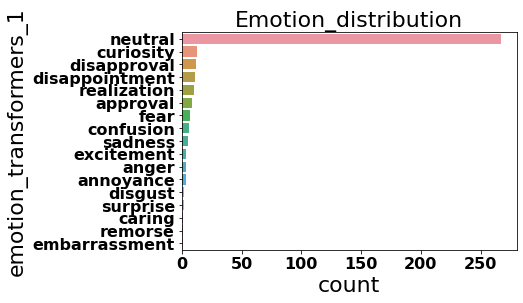

In [103]:
sns.countplot(data=european_union_neg_headlines, y="emotion_transformers_1",order= european_union_neg_headlines['emotion_transformers_1'].value_counts().index).set_title("Emotion_distribution")

<AxesSubplot:ylabel='emotion_transformers_1'>

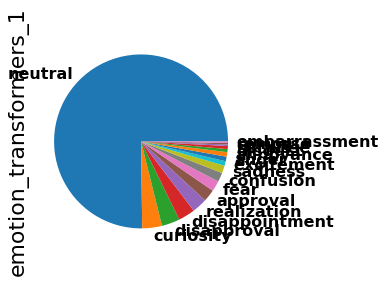

In [106]:
european_union_neg_headlines['emotion_transformers_1'].value_counts().plot(kind='pie')

In [111]:
european_union_neg_headlines['emotion_transformers_1'].unique()

array(['neutral', 'confusion', 'caring', 'approval', 'fear', 'curiosity',
       'excitement', 'realization', 'disapproval', 'remorse', 'disgust',
       'anger', 'embarrassment', 'sadness', 'annoyance', 'surprise',
       'disappointment'], dtype=object)

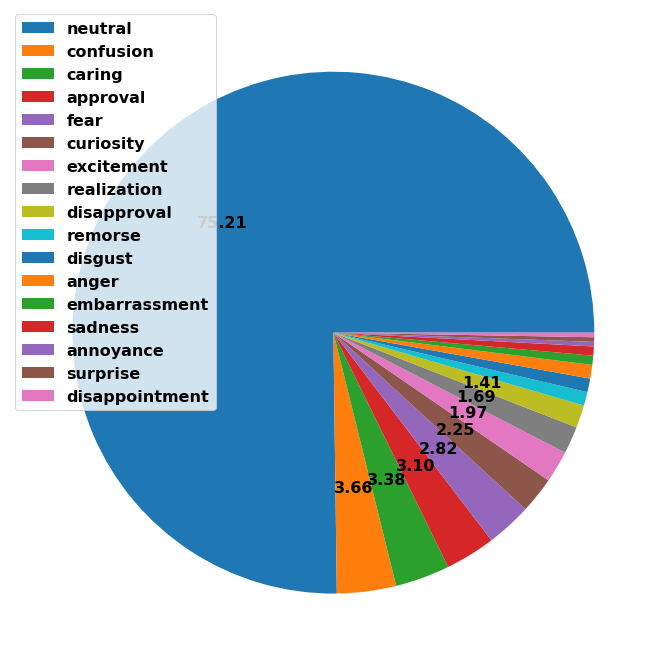

In [137]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 1 else ''

my_labels = european_union_neg_headlines['emotion_transformers_1'].unique()

ax = european_union_neg_headlines['emotion_transformers_1'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(labels=my_labels)

In [75]:
european_union_neg_headlines['emotion_transformers_t5']=european_union_neg_headlines['Title_en'].apply(get_emotion)

/tmp/ipykernel_262600/1192981446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_union_neg_headlines['emotion_transformers_t5']=european_union_neg_headlines['Title_en'].apply(get_emotion)


Text(0.5, 1.0, 'Emotion_distribution')

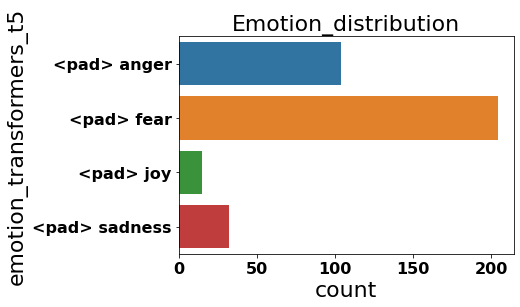

In [76]:
sns.countplot(data=european_union_neg_headlines, y="emotion_transformers_t5").set_title("Emotion_distribution")

In [77]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
newStopWords = ['and','also', 'This','this']
stop.extend(newStopWords)
european_union_neg_headlines['Title_en_prepro'] = european_union_neg_headlines['Title_en'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

/tmp/ipykernel_262600/104722493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_union_neg_headlines['Title_en_prepro'] = european_union_neg_headlines['Title_en'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [78]:
european_union_neg_headlines['emotions_lexicon']=european_union_neg_headlines['Title_en_prepro'].apply(lambda x: NRCLex(x).affect_frequencies)

/tmp/ipykernel_262600/2102780656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_union_neg_headlines['emotions_lexicon']=european_union_neg_headlines['Title_en_prepro'].apply(lambda x: NRCLex(x).affect_frequencies)


In [79]:
european_union_neg_headlines['top_emotions_lexicon']=european_union_neg_headlines['Title_en_prepro'].apply(lambda x: NRCLex(x).top_emotions)

/tmp/ipykernel_262600/2920838606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_union_neg_headlines['top_emotions_lexicon']=european_union_neg_headlines['Title_en_prepro'].apply(lambda x: NRCLex(x).top_emotions)


In [80]:
pd.options.display.max_colwidth = 100
eu_emotion=european_union_neg_headlines[['Title_en','emotion_transformers_1','emotion_transformers_t5','emotions_lexicon','top_emotions_lexicon']]

In [81]:
eu_emotion[eu_emotion['emotion_transformers_1']=="curiosity"]

Title_en  \
1358                                                     Covid-19. Why are coronavirus variants a concern?   
1634                   Health pass. Why many French people abroad find themselves stranded on their return   
1930                        Covid-19. Why travelling in Europe is still a headache despite the health pass   
3673                      Covid-19. Why AstraZeneca's vaccine delivery problems turned into a legal battle   
5317        Covid-19. Vaccines, restrictions, casualties.... What is the status of the pandemic in the US?   
12338  Vaccine shortages, delivery delays, new orders: what is the status of the Covax programme?      ...   
12540                                                    Are the labs making too much money from vaccines?   
12896                                                           Coronavirus: has Africa escaped the worst?   
13314        Joint, scholarships, lotteries... is anything possible to encourage people to get vaccinated?   
13378                      Why is Hungary allowing Russian and Chinese vaccines before the rest of Europe?   
13464                                                         Covid-19: 30 million vaccinated... Now what?   
13961                                                                        Has Africa escaped the worst?   
14302                              Anti-Covid vaccine: why 200 million doses for 67 million French people?   

      emotion_transformers_1 emotion_transformers_t5  \
1358               curiosity              <pad> fear   
1634               curiosity              <pad> fear   
1930               curiosity           <pad> sadness   
3673               curiosity             <pad> anger   
5317               curiosity              <pad> fear   
12338              curiosity              <pad> fear   
12540              curiosity              <pad> fear   
12896              curiosity              <pad> fear   
13314              curiosity               <pad> joy   
13378              curiosity             <pad> anger   
13464              curiosity              <pad> fear   
13961              curiosity              <pad> fear   
14302              curiosity             <pad> anger   

                                                                                          emotions_lexicon  \
1358   {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'neg...   
1634   {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'neg...   
1930   {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'neg...   
3673   {'fear': 0.0, 'anger': 0.14285714285714285, 'anticip': 0.0, 'trust': 0.14285714285714285, 'surpr...   
5317   {'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.25, 'n...   
12338  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.6666666...   
12540  {'fear': 0.0, 'anger': 0.16666666666666666, 'anticip': 0.0, 'trust': 0.16666666666666666, 'surpr...   
12896  {'fear': 1.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'neg...   
13314  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.3333333333333333, 'surprise': 0.0, 'posit...   
13378  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 1.0, 'neg...   
13464  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'neg...   
13961  {'fear': 1.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'neg...   
14302  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 1.0, 'neg...   

                                                                                      top_emotions_lexicon  
1358   [(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 0.0), (surprise, 0.0), (positive, 0.0), (neg...  
1634         

In [138]:
european_union['emotion_transformers_1']=european_union['Title_en'].apply(get_emotion_label)

/tmp/ipykernel_262600/2185770396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_union['emotion_transformers_1']=european_union['Title_en'].apply(get_emotion_label)


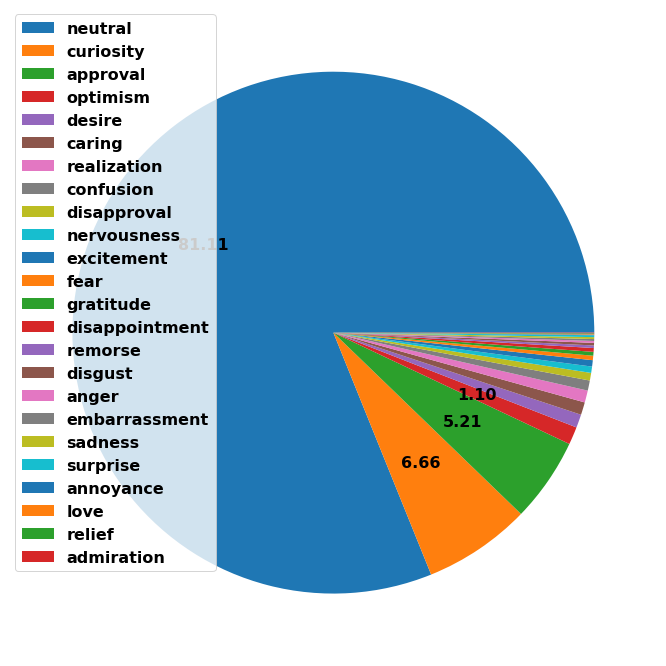

In [139]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 1 else ''

my_labels = european_union['emotion_transformers_1'].unique()

ax = european_union['emotion_transformers_1'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(labels=my_labels)

## Russia topic 

In [82]:
russia_neg_headlines=russia[russia['sentiment_title']=="Negative"]

In [83]:
russia_neg_headlines['emotion_transformers_1']=russia_neg_headlines['Title_en'].apply(get_emotion_label)

/tmp/ipykernel_262600/418559189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia_neg_headlines['emotion_transformers_1']=russia_neg_headlines['Title_en'].apply(get_emotion_label)


Text(0.5, 1.0, 'Emotion_distribution')

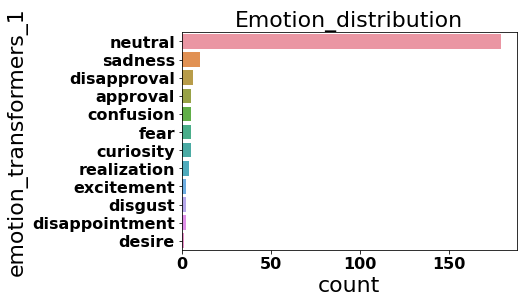

In [84]:
sns.countplot(data=russia_neg_headlines, y="emotion_transformers_1",order= russia_neg_headlines['emotion_transformers_1'].value_counts().index).set_title("Emotion_distribution")

In [85]:
russia_neg_headlines['emotion_transformers_t5']=russia_neg_headlines['Title_en'].apply(get_emotion)

/tmp/ipykernel_262600/4233741542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia_neg_headlines['emotion_transformers_t5']=russia_neg_headlines['Title_en'].apply(get_emotion)


Text(0.5, 1.0, 'Emotion_distribution')

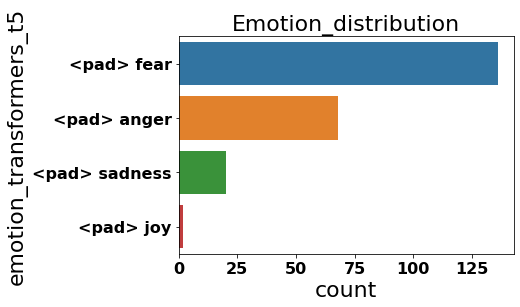

In [86]:
sns.countplot(data=russia_neg_headlines, y="emotion_transformers_t5",order= russia_neg_headlines['emotion_transformers_t5'].value_counts().index).set_title("Emotion_distribution")

In [87]:
no_vax_neg_headlines=no_vax[no_vax['sentiment_title']=="Negative"]

In [88]:
no_vax_neg_headlines['emotion_transformers_1']=no_vax_neg_headlines['Title_en'].apply(get_emotion_label)

/tmp/ipykernel_262600/3488425275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_vax_neg_headlines['emotion_transformers_1']=no_vax_neg_headlines['Title_en'].apply(get_emotion_label)


Text(0.5, 1.0, 'Emotion_distribution')

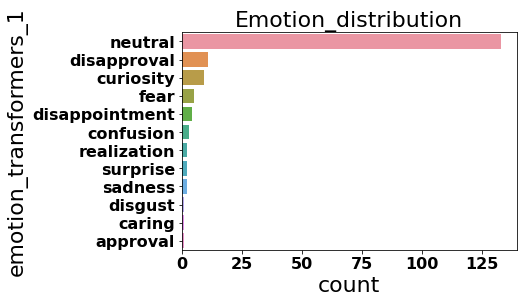

In [89]:
sns.countplot(data=no_vax_neg_headlines, y="emotion_transformers_1",order= no_vax_neg_headlines['emotion_transformers_1'].value_counts().index).set_title("Emotion_distribution")

In [90]:
no_vax_neg_headlines['emotion_transformers_t5']=no_vax_neg_headlines['Title_en'].apply(get_emotion)

/tmp/ipykernel_262600/1494345594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_vax_neg_headlines['emotion_transformers_t5']=no_vax_neg_headlines['Title_en'].apply(get_emotion)


Text(0.5, 1.0, 'Emotion_distribution')

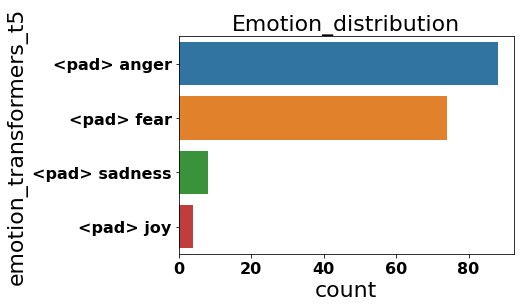

In [91]:
sns.countplot(data=no_vax_neg_headlines, y="emotion_transformers_t5",order= no_vax_neg_headlines['emotion_transformers_t5'].value_counts().index).set_title("Emotion_distribution")

In [92]:
no_vax['emotion_transformers_t5']=no_vax['Title_en'].apply(get_emotion)

/tmp/ipykernel_262600/2533819852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_vax['emotion_transformers_t5']=no_vax['Title_en'].apply(get_emotion)


In [93]:
no_vax['emotion_transformers_1']=no_vax['Title_en'].apply(get_emotion_label)

/tmp/ipykernel_262600/911052838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_vax['emotion_transformers_1']=no_vax['Title_en'].apply(get_emotion_label)


Text(0.5, 1.0, 'Emotion_distribution')

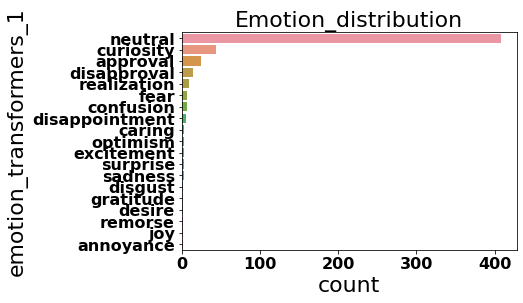

In [94]:
sns.countplot(data=no_vax, y="emotion_transformers_1",order= no_vax['emotion_transformers_1'].value_counts().index).set_title("Emotion_distribution")

In [95]:
no_vax[no_vax['emotion_transformers_1']=="approval"]

Title_en  \
705               Mobilisation against the health pass. Processions in 200 cities, but fewer demonstrators   
2991                         Why the future coronavirus vaccine will have side effects (and that's normal)   
4261                                            Covid-19. US gives full approval to Pfizer's Covid vaccine   
4373                                                                 Editorial. I'll go and get vaccinated   
4650            AstraZeneca. Yes, it is effective, and the laboratory's managers have never said otherwise   
4728                                           Douarnenez. "We weren't anti-vaccine but we were hesitant".   
5099            Brazil. Parliamentary investigation commission approves Bolsonaro's request for indictment   
5800                                       Pfizer-BioNTech's Covid-19 vaccine now fully approved in the US   
6253       Compulsory vaccination 'necessary in a democratic society', says European Court of Human Rights   
7039   Anti-vaccine rhetoric, which is well established in France, has become even more vigorous with t...   
7268                                                          Consent to the Covid-19 vaccine, a hot topic   
8084                  Covid-19: Pfizer vaccine fully approved in the US and made mandatory in the military   
8318                               Castex on Twitch: "We must have confidence in the AstraZeneca vaccine".   
8545                                               In Sevran, "the sooner I can get vaccinated, the better   
9901                 Anti-pass protest in Bordeaux: "We must defend our free will against health blackmail   
11570                       Covid: accused of wanting to make vaccines mandatory, the executive backs down   
12260  "It's my right to catch the Covid if I want": in Paris, opponents of the health pass claim their...   
12324                                                                               The right to a vaccine   
13203                                                                               The right to a vaccine   
13440                         Covid-19: "Since I have been vaccinated, my family accepts to see me again".   
13893                                                                  "It's my right to catch the Covid".   
14113                                                                      Choosing the vaccine fraternity   
14237                             In Montpellier, the mobilisation against the health pass does not weaken   
14389                                    "Since I have been vaccinated, my family agrees to see me again".   

                                                                                                   Text_en  \
705    Demonstrations against the health pass will have been held every Saturday during the summer. For...   
2991   For weeks now, scientists have been in a frenzy, mobilised as never before to try to find a vacc...   
4261   The United States on Monday 23 August fully approved the Pfizer/BioNTech alliance's vaccine for ...   
4373   The end of the year is approaching. And many of us will be saying "at last"; aware, however, tha...   
4650   "The AstraZeneca vaccine is being shunned, but what about its real effectiveness? Officials from...   
4728   14 h 05. The first people are flocking to the vaccination centre in the Jules Verne hall in Doua...   
5099   The Parliamentary Commission of Inquiry (PIC) into the pandemic in Brazil approved late on Tuesd...   
5800   It was previously granted temporary emergency approval. The Pfizer-BioNTech alliance's Covid-19 ...   
6253   The European Court of Human Rights (ECHR) has ruled that compulsory vaccination is "necessary in...   
7039   Messages accusing the pharmaceutical industry of preparing overpriced vaccines, Facebook groups ...   
7268   Hope for some, new cause for concern for others. The enthusiastic results announced on Monday 9 ...   
8084   It had been injected

In [3]:
spain_words="Spain"
spain=df[(df['Title_en'].str.contains(spain_words))|(df['Text_en'].str.contains(spain_words))]
len(spain)/len(df)

fr_words="France"
fr=df[(df['Title_en'].str.contains(fr_words))|(df['Text_en'].str.contains(fr_words))]
len(fr)/len(df)

it_words="Italy"
it=df[(df['Title_en'].str.contains(it_words))|(df['Text_en'].str.contains(it_words))]
len(it)/len(df)

it_words="Italy"
it=df[(df['Title_en'].str.contains(it_words))|(df['Text_en'].str.contains(it_words))]
len(it)/len(df)

sw_words="Switzerland"
sw=df[(df['Title_en'].str.contains(sw_words))|(df['Text_en'].str.contains(sw_words))]
len(sw)/len(df)

uk_words="United Kingdom|UK"
uk=df[(df['Title_en'].str.contains(uk_words))|(df['Text_en'].str.contains(uk_words))]
len(uk)/len(df)

0.05986910093007234